In [64]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


# Introduction
    - The goal of this notebook is to test some ML models in order to optimize fraud detection for an ecommerce website
    - We will try out different classifiers (logreg, decision tree, random forest, svm) and also try a boosting method with AdaBoost
    - The purpose of this exercise is to practice Machine Learning as well as data processing

## Data Exploration

In [65]:
# import data
fraud_init = pd.read_csv("Fraud_Data.csv")
ip_init = pd.read_csv("IpAddress_to_Country.csv")

In [66]:
print(fraud_init.shape)
fraud_init.head()


(151112, 11)


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [67]:
fraud_init.describe(include="all")

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
count,151112.000000,151112,151112,151112.000000,151112,151112,151112,151112,151112.000000,1.511120e+05,151112.000000
unique,NaN,151112,150679,NaN,137956,3,5,2,NaN,NaN,NaN
top,NaN,2015-02-12 04:18:34,2015-06-08 09:42:04,NaN,NGQCKIADMZORL,SEO,Chrome,M,NaN,NaN,NaN
freq,NaN,1,3,NaN,20,60615,61432,88293,NaN,NaN,NaN
mean,200171.040970,NaN,NaN,36.935372,NaN,NaN,NaN,NaN,33.140704,2.152145e+09,0.093646
std,115369.285024,NaN,NaN,18.322762,NaN,NaN,NaN,NaN,8.617733,1.248497e+09,0.291336
min,2.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,18.000000,5.209350e+04,0.000000
25%,100642.500000,NaN,NaN,22.000000,NaN,NaN,NaN,NaN,27.000000,1.085934e+09,0.000000
50%,199958.000000,NaN,NaN,35.000000,NaN,NaN,NaN,NaN,33.000000,2.154770e+09,0.000000
75%,300054.000000,NaN,NaN,49.000000,NaN,NaN,NaN,NaN,39.000000,3.243258e+09,0.000000


In [68]:
fraud_init.corr()

,user_id,purchase_value,age,ip_address,class
user_id,1.000000,0.002617,0.000611,-0.003144,0.001945
purchase_value,0.002617,1.000000,0.002370,-0.000328,0.001011
age,0.000611,0.002370,1.000000,0.001140,0.006624
ip_address,-0.003144,-0.000328,0.001140,1.000000,-0.005208
class,0.001945,0.001011,0.006624,-0.005208,1.000000


In [69]:
print(ip_init.shape)
ip_init.head()

(138846, 3)


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [70]:
def transform_ip(ip_ad) :
    try :
        return ip_init.country[(ip_init.lower_bound_ip_address < ip_ad) &\
                                  (ip_init.upper_bound_ip_address > ip_ad)].iloc[0]
    except IndexError :
        return "Unknown_Country"  
fraud_init["country_name"] = fraud_init["ip_address"].apply(transform_ip)

In [7]:
fraud_init.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country_name
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown_Country
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [8]:
fraud_init.describe(include="all")

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country_name
count,151112.000000,151112,151112,151112.000000,151112,151112,151112,151112,151112.000000,1.511120e+05,151112.000000,151112
unique,NaN,151112,150679,NaN,137956,3,5,2,NaN,NaN,NaN,182
top,NaN,2015-02-12 04:18:34,2015-06-08 09:42:04,NaN,NGQCKIADMZORL,SEO,Chrome,M,NaN,NaN,NaN,United States
freq,NaN,1,3,NaN,20,60615,61432,88293,NaN,NaN,NaN,58049
mean,200171.040970,NaN,NaN,36.935372,NaN,NaN,NaN,NaN,33.140704,2.152145e+09,0.093646,NaN
std,115369.285024,NaN,NaN,18.322762,NaN,NaN,NaN,NaN,8.617733,1.248497e+09,0.291336,NaN
min,2.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,18.000000,5.209350e+04,0.000000,NaN
25%,100642.500000,NaN,NaN,22.000000,NaN,NaN,NaN,NaN,27.000000,1.085934e+09,0.000000,NaN
50%,199958.000000,NaN,NaN,35.000000,NaN,NaN,NaN,NaN,33.000000,2.154770e+09,0.000000,NaN
75%,300054.000000,NaN,NaN,49.000000,NaN,NaN,NaN,NaN,39.000000,3.243258e+09,0.000000,NaN


In [10]:
# function that easily returns table of count with percentage
def show_unique_count(df_name, column_name, digits=2):
    
    count = df_name[column_name].value_counts(dropna=False)
    percentage = (df_name[column_name].value_counts \
                      (dropna=False, normalize=True) \
                      *100).round(digits)
    table = pd.concat([count,percentage],\
                    axis=1,\
                    keys=['counts', '%'])
    return(table)

In [76]:
show_unique_count(fraud_init, "country_name")
### lot's of uknown countries --> will see if they have an effect on conversion 

,counts,%
United States,58049,38.41
Unknown_Country,21966,14.54
China,12038,7.97
Japan,7306,4.83
United Kingdom,4490,2.97
...,...,...
South Sudan,1,0.00
Bonaire; Sint Eustatius; Saba,1,0.00
British Indian Ocean Territory,1,0.00
Tajikistan,1,0.00


## Data Transformation

In [72]:
# dataframe to work on from now on 
fraud = fraud_init.copy()

In [73]:
fraud.describe()

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [77]:
# dropping duplicates
fraud = fraud.drop_duplicates()

In [78]:
fraud.describe() ## we see there were no duplicates

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [16]:
# show unique count for country_name
show_unique_count(fraud, "country_name")

,counts,%
United States,58049,38.41
Unknown_Country,21966,14.54
China,12038,7.97
Japan,7306,4.83
United Kingdom,4490,2.97
...,...,...
South Sudan,1,0.00
Bonaire; Sint Eustatius; Saba,1,0.00
British Indian Ocean Territory,1,0.00
Tajikistan,1,0.00


In [79]:
## putting countries with under 20 occurences into "other"
count_country = fraud["country_name"].value_counts(dropna=False)
fraud["country_name"] = np.where(fraud["country_name"].
                                 isin(count_country.index[count_country >=20]),\
                                 fraud["country_name"], 'Other')

In [80]:
# checking it worked well
fraud["country_name"].value_counts(ascending = True).head()

Guatemala              20
Iraq                   20
Trinidad and Tobago    22
Malta                  22
Namibia                23
Name: country_name, dtype: int64

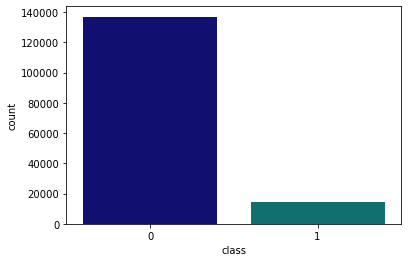

In [81]:
# checking the class category 
palette = ['navy', 'teal', 'lightskyblue', "lightblue"]

sns.countplot(fraud["class"], order = fraud["class"].value_counts().index, palette =palette )

#### safe to assume that 0 correspoonds to no_fraud and 1 to fraud
#### let's plot percentage of fraud

In [22]:
show_unique_count(fraud, "class")

,counts,%
0,136961,90.64
1,14151,9.36


In [92]:
# check distribution of fraud in "uknown countries"
pd.options.display.max_rows = 999
(fraud.groupby(["country_name"])["class"].\
value_counts(normalize=True)*100).round(1).unstack(["class"]) #let's prepare a df to plot what we need

class,0,1
country_name,,
Algeria,89.3,10.7
Angola,95.8,4.2
Argentina,90.0,10.0
Australia,91.1,8.9
Austria,92.4,7.6
Azerbaijan,91.3,8.7
Bangladesh,91.9,8.1
Belarus,97.2,2.8
Belgium,86.3,13.7


#### Unknown countries have a about 8.6% of fraud, which does not diverge too much from the mean avg, for the purpose of this exercise we can drop the column later on

In [24]:
## let's look at device ID, some seem to appear more than once
id_count = show_unique_count(fraud, "device_id").head(100)
id_count

,counts,%
NGQCKIADMZORL,20,0.01
ZUSVMDEZRBDTX,20,0.01
CQTUVBYIWWWBC,20,0.01
KIPFSCNUGOLDP,20,0.01
ITUMJCKWEYNDD,20,0.01
...,...,...
MLMAILITCBCOY,15,0.01
GZMOUDIAZTTUO,15,0.01
TZZDLDMKAXGXV,15,0.01
VLNELJEFKHYNR,15,0.01


In [112]:
# create a row called device_id_count
fraud['device_id_count'] = fraud.groupby('device_id')['device_id'].transform('count')

In [26]:
#checking
fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country_name,device_id_count
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown_Country,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


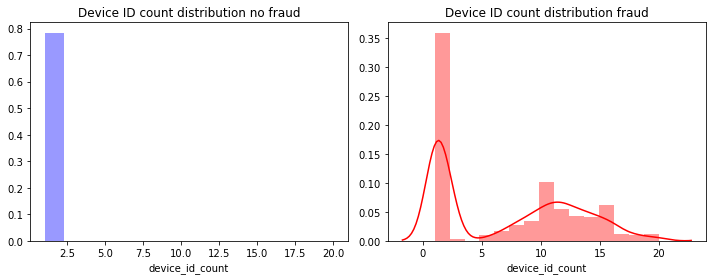

In [114]:
## let's see if there is a diff of distribution in age according class

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 4))  # 2 row, 2 columns

ax1.set_title('Device ID count distribution no fraud')
ax2.set_title('Device ID count distribution fraud')

sns.distplot(fraud[fraud["class"] ==0]['device_id_count'], color = "blue", bins=15, ax=ax1)
sns.distplot(fraud[fraud["class"] ==1]['device_id_count'], color = "red", bins=15, ax=ax2)
      
plt.tight_layout()
plt.show()

### How do we treat signup_time and purchase_time? 
- signup time --> let's keep time only, under the assumption that some sign up times might be more suspicious than others. We can transform it to a timestamp to use it in the model
- purchase time --> let's replace it by the time difference between sign up and purchase

In [93]:
import datetime as dt

In [94]:
fraud["signup_time"] = pd.to_datetime(fraud['signup_time'])

In [95]:
fraud["purchase_time"] = pd.to_datetime(fraud['purchase_time'])

In [96]:
fraud["time_delta"] = (fraud['purchase_time'] - fraud['signup_time']).dt.seconds



In [97]:
# creating a signup column with integers to process it
fraud['signup_time_abs'] = fraud['signup_time'].dt.hour.astype(float)


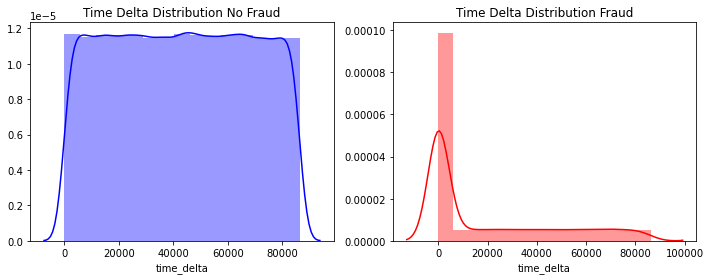

In [108]:
## let's see if there is a diff of distribution in age according class

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 4))  # 2 row, 2 columns

ax1.set_title('Time Delta Distribution No Fraud')
ax2.set_title('Time Delta Distribution Fraud')

sns.distplot(fraud[fraud["class"] ==0]['time_delta'], color = "blue", bins=15, ax=ax1)
sns.distplot(fraud[fraud["class"] ==1]['time_delta'], color = "red", bins=15, ax=ax2)
      
plt.tight_layout()
plt.show()

### It seems quite evident here that frauds tend to have lower delta between sign up and purchase than no fraud

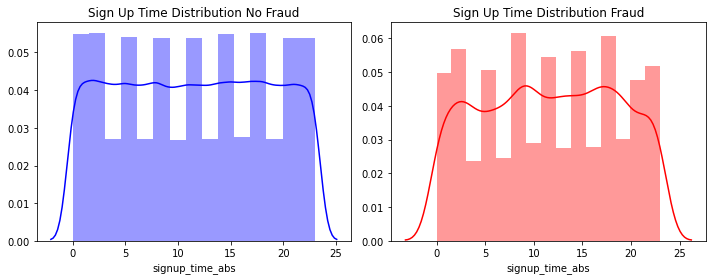

In [110]:
## let's see if there is a diff of distribution in age according class

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 4))  # 2 row, 2 columns

ax1.set_title('Sign Up Time Distribution No Fraud')
ax2.set_title('Sign Up Time Distribution Fraud')

sns.distplot(fraud[fraud["class"] ==0]['signup_time_abs'], color = "blue", bins=15, ax=ax1)
sns.distplot(fraud[fraud["class"] ==1]['signup_time_abs'], color = "red", bins=15, ax=ax2)
      
plt.tight_layout()
plt.show()

### Does not seem to be any obvious difference in between signup time with fraud and without

In [98]:
fraud

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country_name,time_delta,signup_time_abs
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,13882,22.0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944,20.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1,18.0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown_Country,60085,21.0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,41461,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,United States,77233,3.0
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,Netherlands,67270,17.0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,Japan,28816,23.0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,United States,48519,20.0


### Let's take a look at age 

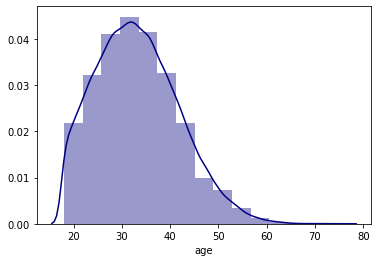

In [99]:
## let's plot age to see if there are any outliers

sns.distplot(fraud['age'], color = "navy", bins=15)

### Distribution is less normalized when there is fraud, however we can take out outliers, especially under 60s
- let's take out those under 3 stds

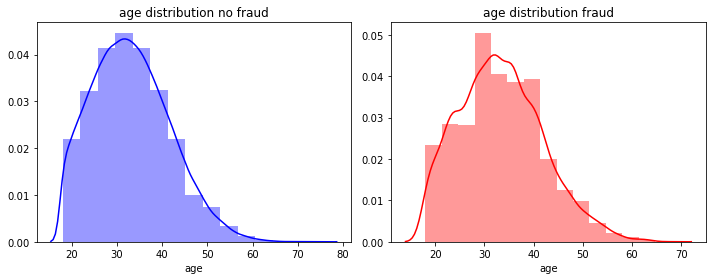

In [105]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 4))  # 2 row, 2 columns

ax1.set_title('age distribution no fraud')
ax2.set_title('age distribution fraud')

sns.distplot(fraud[fraud["class"] ==0]['age'], color = "blue", bins=15, ax=ax1)
sns.distplot(fraud[fraud["class"] ==1]['age'], color = "red", bins=15, ax=ax2)
      
plt.tight_layout()
plt.show()

In [115]:
fraud_clean = fraud[(fraud["age"].abs()-fraud["age"].mean()) <= (3*fraud["age"].std())]


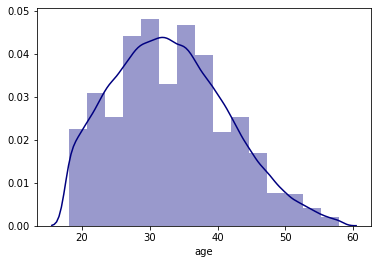

In [116]:
sns.distplot(fraud_clean['age'], color = "navy", bins=15)

In [117]:
fraud_clean.describe(include="all")

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country_name,time_delta,signup_time_abs,device_id_count
count,150559.000000,150559,150559,150559.000000,150559,150559,150559,150559,150559.000000,1.505590e+05,150559.000000,150559,150559.000000,150559.000000,150559.000000
unique,NaN,150559,150132,NaN,137470,3,5,2,NaN,NaN,NaN,103,NaN,NaN,NaN
top,NaN,2015-06-30 03:58:38,2015-09-10 09:04:53,NaN,KIPFSCNUGOLDP,SEO,Chrome,M,NaN,NaN,NaN,United States,NaN,NaN,NaN
freq,NaN,1,3,NaN,20,60400,61223,87967,NaN,NaN,NaN,57836,NaN,NaN,NaN
first,NaN,2015-01-01 00:00:42,2015-01-01 00:00:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-08-18 04:40:29,2015-12-16 02:56:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,200184.206305,NaN,NaN,36.935201,NaN,NaN,NaN,NaN,33.036756,2.152262e+09,0.093664,NaN,40940.477972,11.490519,1.684635
std,115370.362863,NaN,NaN,18.321234,NaN,NaN,NaN,NaN,8.459321,1.248566e+09,0.291362,NaN,26049.968544,6.917197,2.617998
min,2.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,18.000000,5.209350e+04,0.000000,NaN,1.000000,0.000000,1.000000
25%,100662.500000,NaN,NaN,22.000000,NaN,NaN,NaN,NaN,27.000000,1.085948e+09,0.000000,NaN,18099.000000,5.000000,1.000000


In [118]:
# dropping useless columns 
useless= ["purchase_time", "ip_address", "user_id", "device_id", "signup_time"]
fraud_clean = fraud_clean.drop(columns = useless)

In [119]:
# dropping unknown countries
fraud_clean = fraud_clean[fraud_clean["country_name"] !="Unknown_Country"]

In [120]:
fraud_clean.describe(include="all")

,purchase_value,source,browser,sex,age,class,country_name,time_delta,signup_time_abs,device_id_count
count,128670.000000,128670,128670,128670,128670.000000,128670.000000,128670,128670.000000,128670.000000,128670.000000
unique,NaN,3,5,2,NaN,NaN,102,NaN,NaN,NaN
top,NaN,SEO,Chrome,M,NaN,NaN,United States,NaN,NaN,NaN
freq,NaN,51778,52380,75164,NaN,NaN,57836,NaN,NaN,NaN
mean,36.932440,NaN,NaN,NaN,33.023751,0.094972,NaN,40873.792477,11.493215,1.701251
std,18.316886,NaN,NaN,NaN,8.455853,0.293177,NaN,26077.686100,6.910413,2.656169
min,9.000000,NaN,NaN,NaN,18.000000,0.000000,NaN,1.000000,0.000000,1.000000
25%,22.000000,NaN,NaN,NaN,27.000000,0.000000,NaN,17976.000000,6.000000,1.000000
50%,35.000000,NaN,NaN,NaN,32.000000,0.000000,NaN,40792.500000,12.000000,1.000000
75%,49.000000,NaN,NaN,NaN,39.000000,0.000000,NaN,63463.750000,17.000000,1.000000


In [121]:
fraud_clean.head()

,purchase_value,source,browser,sex,age,class,country_name,time_delta,signup_time_abs,device_id_count
0,34,SEO,Chrome,M,39,0,Japan,13882,22.0,1
1,16,Ads,Chrome,F,53,0,United States,17944,20.0,1
2,15,SEO,Opera,M,53,1,United States,1,18.0,12
4,39,Ads,Safari,M,45,0,United States,41461,7.0,1
5,42,Ads,Chrome,M,18,0,Canada,7331,6.0,1


### Preprocessing for Model 

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer


In [123]:
## X variables
X = fraud_clean.drop(columns="class")
X.head()

,purchase_value,source,browser,sex,age,country_name,time_delta,signup_time_abs,device_id_count
0,34,SEO,Chrome,M,39,Japan,13882,22.0,1
1,16,Ads,Chrome,F,53,United States,17944,20.0,1
2,15,SEO,Opera,M,53,United States,1,18.0,12
4,39,Ads,Safari,M,45,United States,41461,7.0,1
5,42,Ads,Chrome,M,18,Canada,7331,6.0,1


In [124]:
y = fraud_clean["class"]
y.head()

0    0
1    0
2    1
4    0
5    0
Name: class, dtype: int64

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    stratify = y , ## Statify splitting when you're training a classification model !
                                                    random_state = 0)

In [126]:
# Create pipeline for numeric features
numeric_features = [0,4,6,7,8] # Positions of numeric columns in X_train/X_test
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [127]:
# Create pipeline for categorical features
categorical_features = [1, 2,3,5] # Positions of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

In [128]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [129]:
# Preprocessings on train set

X_train = preprocessor.fit_transform(X_train)

# Preprocessings on test set
X_test = preprocessor.transform(X_test) 

# Baseline Model - LOGREG

In [130]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [131]:
### def function that prints scores

def print_scores(model_name, X_train = X_train, X_test = X_test, y_test = y_test, y_train = y_train): 
    
    from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
    
    print("scores for default model on test set")
    print("")
    print('Accuracy Score : {}'.format(str(accuracy_score(y_test,model_name.predict(X_test)))))
    print('Precision Score : {}'.format(str(precision_score(y_test,model_name.predict(X_test)))))
    print('Recall Score : {}' .format(str(recall_score(y_test,model_name.predict(X_test)))))
    print('F1 Score : {}'.format(str(f1_score(y_test,model_name.predict(X_test)))))
    
    print("")
    print("")
    print("scores for default model on train set")
    print("")
    print('Accuracy Score : {}'.format(str(accuracy_score(y_train,model_name.predict(X_train)))))
    print('Precision Score : {}'.format(str(precision_score(y_train,model_name.predict(X_train)))))
    print('Recall Score : {}' .format(str(recall_score(y_train,model_name.predict(X_train)))))
    print('F1 Score : {}'.format(str(f1_score(y_train,model_name.predict(X_train)))))

In [132]:
print_scores(lr_clf)

scores for default model on test set

Accuracy Score : 0.9513872697598508
Precision Score : 0.9094028826355525
Recall Score : 0.5421440261865794
F1 Score : 0.6793129966675212


scores for default model on train set

Accuracy Score : 0.9506198025957877
Precision Score : 0.9139177985535368
Recall Score : 0.5299713584288053
F1 Score : 0.6708967303334412


In [134]:
## cross val score
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(lr_clf, X_train, y_train, cv=10, scoring= "f1")



/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

In [135]:
print(cv_score)
print("")
print(cv_score.mean())
print(cv_score.std())

[0.66926576 0.67658473 0.66535433 0.66666667 0.66449935 0.65889968
 0.6756931  0.67101828 0.66623377 0.68789809]

0.670211374873337
0.007730414899224172


In [136]:
# def function that shows confusion matrix
def show_confusion_matrix(model_name,X_train = X_train , X_test = X_test, y_test = y_test , y_train = y_train ):
    import matplotlib.pyplot as plt 
    from sklearn.metrics import confusion_matrix

    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 4))  

    ax1.set_title('Confusion Matrix of the test set')
    ax1.set_xlabel("Predicted Values")
    ax1.set_ylabel("Actual Values")
    
    ax2.set_title('Confusion Matrix of the train set')
    ax2.set_xlabel("Predicted Values")
    ax2.set_ylabel("Actual Values")
    
    cfm_test = confusion_matrix(y_test,model_name.predict(X_test))
    cfm_train = confusion_matrix(y_train,model_name.predict(X_train))
    sns.heatmap(cfm_test, annot=True, fmt="g", cmap="seismic", ax=ax1, )
    sns.heatmap(cfm_train, annot=True, fmt="g", cmap="seismic", ax=ax2)
    
    
    plt.tight_layout(), plt.show()

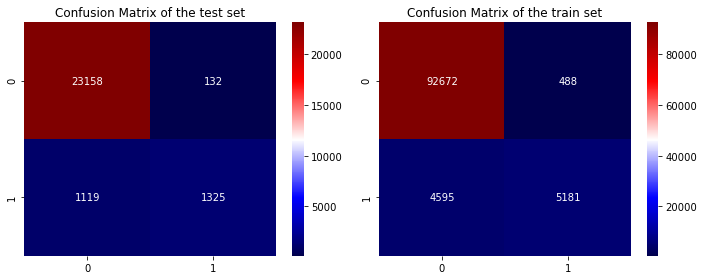

In [137]:
show_confusion_matrix(lr_clf)

#  Randomized Gridsearch CV on LOGREG
- For time processing reason, we're not doing a random serach rather than a full gridsearch

In [139]:
# Random search cross validation
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=0) 

parameters= {"C": np.logspace(-4, 4, 20), \
             "class_weight": [{1:0.67, 0:0.33}, {1:0.75, 0:0.25}, {1:0.8, 0:0.2}, "None", "balanced"], \
            "penalty": ["l1", "l2", "elasticnet"], \
            "solver" : ["newton-cg", "lbfgs", "sag", "saga"]}

model = LogisticRegression()
model_rs = RandomizedSearchCV(model, parameters, cv=kfold, verbose=2, scoring="f1", n_iter=120)
model_rs.fit(X_train,y_train)


Fitting 4 folds for each of 120 candidates, totalling 480 fits
[CV] solver=saga, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=10000.0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s


[CV]  solver=saga, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=10000.0, total=   5.0s
[CV] solver=saga, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=10000.0 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=saga, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=10000.0, total=   4.9s
[CV] solver=saga, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=10000.0 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=saga, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=10000.0, total=   5.3s
[CV] solver=saga, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=10000.0 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=saga, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=10000.0, total=   4.8s
[CV] solver=lbfgs, penalty=l2, class_weight=None, C=0.0006951927961775605 
[CV]  solver=lbfgs, penalty=l2, class_weight=None, C=0.0006951927961775605, total=   0.2s
[CV] solver=lbfgs, penalty=l2, class_weight=None, C=0.0006951927961775605 
[CV]  solver=lbfgs, penalty=l2, class_weight=None, C=0.0006951927961775605, total=   0.2s
[CV] solver=lbfgs, penalty=l2, class_weight=None, C=0.0006951927961775605 
[CV]  solver=lbfgs, penalty=l2, class_weight=None, C=0.0006951927961775605, total=   0.1s
[CV] solver=lbfgs, penalty=l2, class_weight=None, C=0.0006951927961775605 
[CV]  solver=lbfgs, penalty=l2, class_weight=None, C=0.0006951927961775605, total=   0.2s
[CV] solver=saga, penalty=elasticnet, class_weight=None, C=0.23357214690901212 
[CV]  solver=saga, penalty=elasticnet, class_weight=None, C=0.23357214690901212, total=   0.0s
[CV] solver=saga, penalty=elasticnet, class_weight=None, C=0.233572146909012

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1312, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Tra

[CV]  solver=newton-cg, penalty=l1, class_weight=None, C=0.0001, total=   0.0s
[CV] solver=sag, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=10000.0 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=sag, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=10000.0, total=  10.0s
[CV] solver=sag, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=10000.0 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=sag, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=10000.0, total=   5.4s
[CV] solver=sag, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=10000.0 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=sag, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=10000.0, total=   5.5s
[CV] solver=sag, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=10000.0 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
  

[CV]  solver=sag, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=10000.0, total=   4.7s
[CV] solver=sag, penalty=elasticnet, class_weight={1: 0.67, 0: 0.33}, C=3792.690190732246 
[CV]  solver=sag, penalty=elasticnet, class_weight={1: 0.67, 0: 0.33}, C=3792.690190732246, total=   0.0s
[CV] solver=sag, penalty=elasticnet, class_weight={1: 0.67, 0: 0.33}, C=3792.690190732246 
[CV]  solver=sag, penalty=elasticnet, class_weight={1: 0.67, 0: 0.33}, C=3792.690190732246, total=   0.0s
[CV] solver=sag, penalty=elasticnet, class_weight={1: 0.67, 0: 0.33}, C=3792.690190732246 
[CV]  solver=sag, penalty=elasticnet, class_weight={1: 0.67, 0: 0.33}, C=3792.690190732246, total=   0.0s
[CV] solver=sag, penalty=elasticnet, class_weight={1: 0.67, 0: 0.33}, C=3792.690190732246 
[CV]  solver=sag, penalty=elasticnet, class_weight={1: 0.67, 0: 0.33}, C=3792.690190732246, total=   0.0s
[CV] solver=lbfgs, penalty=elasticnet, class_weight=balanced, C=0.615848211066026 
[CV]  solver=lbfgs, penalty=elasticnet, c

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Us

[CV]  solver=lbfgs, penalty=l2, class_weight=None, C=1.623776739188721, total=   1.0s
[CV] solver=lbfgs, penalty=l2, class_weight=None, C=1.623776739188721 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  solver=lbfgs, penalty=l2, class_weight=None, C=1.623776739188721, total=   0.9s
[CV] solver=lbfgs, penalty=l2, class_weight=None, C=1.623776739188721 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  solver=lbfgs, penalty=l2, class_weight=None, C=1.623776739188721, total=   0.9s
[CV] solver=lbfgs, penalty=l2, class_weight=None, C=1.623776739188721 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  solver=lbfgs, penalty=l2, class_weight=None, C=1.623776739188721, total=   0.9s
[CV] solver=saga, penalty=l1, class_weight={1: 0.8, 0: 0.2}, C=0.615848211066026 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=saga, penalty=l1, class_weight={1: 0.8, 0: 0.2}, C=0.615848211066026, total=   7.9s
[CV] solver=saga, penalty=l1, class_weight={1: 0.8, 0: 0.2}, C=0.615848211066026 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=saga, penalty=l1, class_weight={1: 0.8, 0: 0.2}, C=0.615848211066026, total=   6.1s
[CV] solver=saga, penalty=l1, class_weight={1: 0.8, 0: 0.2}, C=0.615848211066026 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=saga, penalty=l1, class_weight={1: 0.8, 0: 0.2}, C=0.615848211066026, total=   4.8s
[CV] solver=saga, penalty=l1, class_weight={1: 0.8, 0: 0.2}, C=0.615848211066026 
[CV]  solver=saga, penalty=l1, class_weight={1: 0.8, 0: 0.2}, C=0.615848211066026, total=   4.5s
[CV] solver=newton-cg, penalty=l2, class_weight=None, C=78.47599703514607 
[CV]  solver=newton-cg, penalty=l2, class_weight=None, C=78.47599703514607, total=   2.5s
[CV] solver=newton-cg, penalty=l2, class_weight=None, C=78.47599703514607 
[CV]  solver=newton-cg, penalty=l2, class_weight=None, C=78.47599703514607, total=   2.1s
[CV] solver=newton-cg, penalty=l2, class_weight=None, C=78.47599703514607 
[CV]  solver=newton-cg, penalty=l2, class_weight=None, C=78.47599703514607, total=   2.4s
[CV] solver=newton-cg, penalty=l2, class_weight=None, C=78.47599703514607 
[CV]  solver=newton-cg, penalty=l2, class_weight=None, C=78.47599703514607, total=   2.6s
[CV] solver=sag, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=sag, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=545.5594781168514, total=   3.9s
[CV] solver=sag, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=545.5594781168514 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=sag, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=545.5594781168514, total=   3.9s
[CV] solver=sag, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=545.5594781168514 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=sag, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=545.5594781168514, total=   3.9s
[CV] solver=sag, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=545.5594781168514 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=sag, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=545.5594781168514, total=   3.9s
[CV] solver=newton-cg, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=0.23357214690901212 
[CV]  solver=newton-cg, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=0.23357214690901212, total=   0.9s
[CV] solver=newton-cg, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=0.23357214690901212 
[CV]  solver=newton-cg, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=0.23357214690901212, total=   0.9s
[CV] solver=newton-cg, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=0.23357214690901212 
[CV]  solver=newton-cg, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=0.23357214690901212, total=   0.9s
[CV] solver=newton-cg, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=0.23357214690901212 
[CV]  solver=newton-cg, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=0.23357214690901212, total=   0.9s
[CV] solver=lbfgs, penalty=l1, class_weight={1: 0.8, 0: 0.2}, C=0.00026366508987303583 
[CV]  solver=lbfgs, penalt

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/pe

[CV]  solver=lbfgs, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=0.0006951927961775605, total=   0.1s
[CV] solver=lbfgs, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=0.0006951927961775605 
[CV]  solver=lbfgs, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=0.0006951927961775605, total=   0.1s
[CV] solver=lbfgs, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=0.0006951927961775605 
[CV]  solver=lbfgs, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=0.0006951927961775605, total=   0.1s
[CV] solver=lbfgs, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=0.0006951927961775605 
[CV]  solver=lbfgs, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=0.0006951927961775605, total=   0.1s
[CV] solver=saga, penalty=elasticnet, class_weight={1: 0.67, 0: 0.33}, C=0.08858667904100823 
[CV]  solver=saga, penalty=elasticnet, class_weight={1: 0.67, 0: 0.33}, C=0.08858667904100823, total=   0.0s
[CV] solver=saga, penalty=elasticnet, class_weight={1: 0.67, 0: 0.33}, C=0.08858667904100823 
[CV]  solver=saga, p

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1312, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Tra

[CV]  solver=lbfgs, penalty=l1, class_weight={1: 0.8, 0: 0.2}, C=1438.44988828766, total=   0.0s
[CV] solver=lbfgs, penalty=l1, class_weight={1: 0.8, 0: 0.2}, C=1438.44988828766 
[CV]  solver=lbfgs, penalty=l1, class_weight={1: 0.8, 0: 0.2}, C=1438.44988828766, total=   0.0s
[CV] solver=lbfgs, penalty=l1, class_weight={1: 0.8, 0: 0.2}, C=1438.44988828766 
[CV]  solver=lbfgs, penalty=l1, class_weight={1: 0.8, 0: 0.2}, C=1438.44988828766, total=   0.0s
[CV] solver=lbfgs, penalty=l1, class_weight={1: 0.8, 0: 0.2}, C=1438.44988828766 
[CV]  solver=lbfgs, penalty=l1, class_weight={1: 0.8, 0: 0.2}, C=1438.44988828766, total=   0.0s
[CV] solver=sag, penalty=elasticnet, class_weight=balanced, C=206.913808111479 
[CV]  solver=sag, penalty=elasticnet, class_weight=balanced, C=206.913808111479, total=   0.0s
[CV] solver=sag, penalty=elasticnet, class_weight=balanced, C=206.913808111479 
[CV]  solver=sag, penalty=elasticnet, class_weight=balanced, C=206.913808111479, total=   0.0s
[CV] solver=sag,

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=saga, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=29.763514416313132, total=   4.0s
[CV] solver=saga, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=29.763514416313132 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=saga, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=29.763514416313132, total=   4.0s
[CV] solver=saga, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=29.763514416313132 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=saga, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=29.763514416313132, total=   4.1s
[CV] solver=saga, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=29.763514416313132 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
  

[CV]  solver=saga, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=29.763514416313132, total=   4.0s
[CV] solver=newton-cg, penalty=l1, class_weight={1: 0.8, 0: 0.2}, C=10000.0 
[CV]  solver=newton-cg, penalty=l1, class_weight={1: 0.8, 0: 0.2}, C=10000.0, total=   0.0s
[CV] solver=newton-cg, penalty=l1, class_weight={1: 0.8, 0: 0.2}, C=10000.0 
[CV]  solver=newton-cg, penalty=l1, class_weight={1: 0.8, 0: 0.2}, C=10000.0, total=   0.0s
[CV] solver=newton-cg, penalty=l1, class_weight={1: 0.8, 0: 0.2}, C=10000.0 
[CV]  solver=newton-cg, penalty=l1, class_weight={1: 0.8, 0: 0.2}, C=10000.0, total=   0.0s
[CV] solver=newton-cg, penalty=l1, class_weight={1: 0.8, 0: 0.2}, C=10000.0 
[CV]  solver=newton-cg, penalty=l1, class_weight={1: 0.8, 0: 0.2}, C=10000.0, total=   0.0s
[CV] solver=sag, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=0.23357214690901212 
[CV]  solver=sag, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=0.23357214690901212, total=   3.3s
[CV] solver=sag, penalty=l2, class_weig

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=saga, penalty=l1, class_weight=balanced, C=545.5594781168514, total=  10.2s
[CV] solver=saga, penalty=l1, class_weight=balanced, C=545.5594781168514 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=saga, penalty=l1, class_weight=balanced, C=545.5594781168514, total=  10.1s
[CV] solver=saga, penalty=l1, class_weight=balanced, C=545.5594781168514 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=saga, penalty=l1, class_weight=balanced, C=545.5594781168514, total=  10.2s
[CV] solver=saga, penalty=l1, class_weight=balanced, C=545.5594781168514 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
  

[CV]  solver=saga, penalty=l1, class_weight=balanced, C=545.5594781168514, total=  10.1s
[CV] solver=lbfgs, penalty=elasticnet, class_weight=None, C=0.615848211066026 
[CV]  solver=lbfgs, penalty=elasticnet, class_weight=None, C=0.615848211066026, total=   0.0s
[CV] solver=lbfgs, penalty=elasticnet, class_weight=None, C=0.615848211066026 
[CV]  solver=lbfgs, penalty=elasticnet, class_weight=None, C=0.615848211066026, total=   0.0s
[CV] solver=lbfgs, penalty=elasticnet, class_weight=None, C=0.615848211066026 
[CV]  solver=lbfgs, penalty=elasticnet, class_weight=None, C=0.615848211066026, total=   0.0s
[CV] solver=lbfgs, penalty=elasticnet, class_weight=None, C=0.615848211066026 
[CV]  solver=lbfgs, penalty=elasticnet, class_weight=None, C=0.615848211066026, total=   0.0s
[CV] solver=newton-cg, penalty=l2, class_weight=balanced, C=29.763514416313132 
[CV]  solver=newton-cg, penalty=l2, class_weight=balanced, C=29.763514416313132, total=   2.7s
[CV] solver=newton-cg, penalty=l2, class_wei

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-tes

[CV]  solver=saga, penalty=l1, class_weight={1: 0.8, 0: 0.2}, C=0.012742749857031334, total=   1.0s
[CV] solver=saga, penalty=l1, class_weight={1: 0.8, 0: 0.2}, C=0.012742749857031334 
[CV]  solver=saga, penalty=l1, class_weight={1: 0.8, 0: 0.2}, C=0.012742749857031334, total=   0.6s
[CV] solver=saga, penalty=l1, class_weight={1: 0.8, 0: 0.2}, C=0.012742749857031334 
[CV]  solver=saga, penalty=l1, class_weight={1: 0.8, 0: 0.2}, C=0.012742749857031334, total=   0.5s
[CV] solver=saga, penalty=l1, class_weight={1: 0.8, 0: 0.2}, C=0.012742749857031334 
[CV]  solver=saga, penalty=l1, class_weight={1: 0.8, 0: 0.2}, C=0.012742749857031334, total=   0.5s
[CV] solver=newton-cg, penalty=elasticnet, class_weight=balanced, C=1.623776739188721 
[CV]  solver=newton-cg, penalty=elasticnet, class_weight=balanced, C=1.623776739188721, total=   0.0s
[CV] solver=newton-cg, penalty=elasticnet, class_weight=balanced, C=1.623776739188721 
[CV]  solver=newton-cg, penalty=elasticnet, class_weight=balanced, C=

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-tes

[CV]  solver=saga, penalty=l1, class_weight={1: 0.75, 0: 0.25}, C=78.47599703514607, total=  10.0s
[CV] solver=saga, penalty=l1, class_weight={1: 0.75, 0: 0.25}, C=78.47599703514607 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=saga, penalty=l1, class_weight={1: 0.75, 0: 0.25}, C=78.47599703514607, total=  10.0s
[CV] solver=saga, penalty=l1, class_weight={1: 0.75, 0: 0.25}, C=78.47599703514607 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=saga, penalty=l1, class_weight={1: 0.75, 0: 0.25}, C=78.47599703514607, total=  10.0s
[CV] solver=saga, penalty=l1, class_weight={1: 0.75, 0: 0.25}, C=78.47599703514607 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
  

[CV]  solver=saga, penalty=l1, class_weight={1: 0.75, 0: 0.25}, C=78.47599703514607, total=   9.9s
[CV] solver=sag, penalty=elasticnet, class_weight={1: 0.75, 0: 0.25}, C=0.0018329807108324356 
[CV]  solver=sag, penalty=elasticnet, class_weight={1: 0.75, 0: 0.25}, C=0.0018329807108324356, total=   0.0s
[CV] solver=sag, penalty=elasticnet, class_weight={1: 0.75, 0: 0.25}, C=0.0018329807108324356 
[CV]  solver=sag, penalty=elasticnet, class_weight={1: 0.75, 0: 0.25}, C=0.0018329807108324356, total=   0.0s
[CV] solver=sag, penalty=elasticnet, class_weight={1: 0.75, 0: 0.25}, C=0.0018329807108324356 
[CV]  solver=sag, penalty=elasticnet, class_weight={1: 0.75, 0: 0.25}, C=0.0018329807108324356, total=   0.0s
[CV] solver=sag, penalty=elasticnet, class_weight={1: 0.75, 0: 0.25}, C=0.0018329807108324356 
[CV]  solver=sag, penalty=elasticnet, class_weight={1: 0.75, 0: 0.25}, C=0.0018329807108324356, total=   0.0s
[CV] solver=lbfgs, penalty=l1, class_weight=None, C=0.615848211066026 
[CV]  solv

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=saga, penalty=l1, class_weight={1: 0.67, 0: 0.33}, C=3792.690190732246, total=  10.3s
[CV] solver=saga, penalty=l1, class_weight={1: 0.67, 0: 0.33}, C=3792.690190732246 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=saga, penalty=l1, class_weight={1: 0.67, 0: 0.33}, C=3792.690190732246, total=  11.0s
[CV] solver=saga, penalty=l1, class_weight={1: 0.67, 0: 0.33}, C=3792.690190732246 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=saga, penalty=l1, class_weight={1: 0.67, 0: 0.33}, C=3792.690190732246, total=  12.5s
[CV] solver=saga, penalty=l1, class_weight={1: 0.67, 0: 0.33}, C=3792.690190732246 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
  

[CV]  solver=saga, penalty=l1, class_weight={1: 0.67, 0: 0.33}, C=3792.690190732246, total=  11.9s
[CV] solver=sag, penalty=elasticnet, class_weight={1: 0.8, 0: 0.2}, C=0.615848211066026 
[CV]  solver=sag, penalty=elasticnet, class_weight={1: 0.8, 0: 0.2}, C=0.615848211066026, total=   0.0s
[CV] solver=sag, penalty=elasticnet, class_weight={1: 0.8, 0: 0.2}, C=0.615848211066026 
[CV]  solver=sag, penalty=elasticnet, class_weight={1: 0.8, 0: 0.2}, C=0.615848211066026, total=   0.0s
[CV] solver=sag, penalty=elasticnet, class_weight={1: 0.8, 0: 0.2}, C=0.615848211066026 
[CV]  solver=sag, penalty=elasticnet, class_weight={1: 0.8, 0: 0.2}, C=0.615848211066026, total=   0.0s
[CV] solver=sag, penalty=elasticnet, class_weight={1: 0.8, 0: 0.2}, C=0.615848211066026 
[CV]  solver=sag, penalty=elasticnet, class_weight={1: 0.8, 0: 0.2}, C=0.615848211066026, total=   0.0s
[CV] solver=sag, penalty=l1, class_weight={1: 0.75, 0: 0.25}, C=10000.0 
[CV]  solver=sag, penalty=l1, class_weight={1: 0.75, 0: 

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=sag, penalty=l2, class_weight={1: 0.75, 0: 0.25}, C=11.288378916846883, total=   4.7s
[CV] solver=sag, penalty=l2, class_weight={1: 0.75, 0: 0.25}, C=11.288378916846883 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=sag, penalty=l2, class_weight={1: 0.75, 0: 0.25}, C=11.288378916846883, total=   4.7s
[CV] solver=sag, penalty=l2, class_weight={1: 0.75, 0: 0.25}, C=11.288378916846883 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=sag, penalty=l2, class_weight={1: 0.75, 0: 0.25}, C=11.288378916846883, total=   4.6s
[CV] solver=sag, penalty=l2, class_weight={1: 0.75, 0: 0.25}, C=11.288378916846883 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
  

[CV]  solver=sag, penalty=l2, class_weight={1: 0.75, 0: 0.25}, C=11.288378916846883, total=   4.5s
[CV] solver=sag, penalty=l1, class_weight={1: 0.67, 0: 0.33}, C=4.281332398719396 
[CV]  solver=sag, penalty=l1, class_weight={1: 0.67, 0: 0.33}, C=4.281332398719396, total=   0.0s
[CV] solver=sag, penalty=l1, class_weight={1: 0.67, 0: 0.33}, C=4.281332398719396 
[CV]  solver=sag, penalty=l1, class_weight={1: 0.67, 0: 0.33}, C=4.281332398719396, total=   0.0s
[CV] solver=sag, penalty=l1, class_weight={1: 0.67, 0: 0.33}, C=4.281332398719396 
[CV]  solver=sag, penalty=l1, class_weight={1: 0.67, 0: 0.33}, C=4.281332398719396, total=   0.0s
[CV] solver=sag, penalty=l1, class_weight={1: 0.67, 0: 0.33}, C=4.281332398719396 
[CV]  solver=sag, penalty=l1, class_weight={1: 0.67, 0: 0.33}, C=4.281332398719396, total=   0.0s
[CV] solver=sag, penalty=l2, class_weight={1: 0.75, 0: 0.25}, C=3792.690190732246 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=sag, penalty=l2, class_weight={1: 0.75, 0: 0.25}, C=3792.690190732246, total=   4.5s
[CV] solver=sag, penalty=l2, class_weight={1: 0.75, 0: 0.25}, C=3792.690190732246 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=sag, penalty=l2, class_weight={1: 0.75, 0: 0.25}, C=3792.690190732246, total=   4.6s
[CV] solver=sag, penalty=l2, class_weight={1: 0.75, 0: 0.25}, C=3792.690190732246 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=sag, penalty=l2, class_weight={1: 0.75, 0: 0.25}, C=3792.690190732246, total=   4.6s
[CV] solver=sag, penalty=l2, class_weight={1: 0.75, 0: 0.25}, C=3792.690190732246 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=sag, penalty=l2, class_weight={1: 0.75, 0: 0.25}, C=3792.690190732246, total=   4.5s
[CV] solver=sag, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=206.913808111479 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=sag, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=206.913808111479, total=   4.6s
[CV] solver=sag, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=206.913808111479 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=sag, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=206.913808111479, total=   4.6s
[CV] solver=sag, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=206.913808111479 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=sag, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=206.913808111479, total=   4.7s
[CV] solver=sag, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=206.913808111479 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
  

[CV]  solver=sag, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=206.913808111479, total=   4.8s
[CV] solver=lbfgs, penalty=l1, class_weight={1: 0.75, 0: 0.25}, C=545.5594781168514 
[CV]  solver=lbfgs, penalty=l1, class_weight={1: 0.75, 0: 0.25}, C=545.5594781168514, total=   0.0s
[CV] solver=lbfgs, penalty=l1, class_weight={1: 0.75, 0: 0.25}, C=545.5594781168514 
[CV]  solver=lbfgs, penalty=l1, class_weight={1: 0.75, 0: 0.25}, C=545.5594781168514, total=   0.0s
[CV] solver=lbfgs, penalty=l1, class_weight={1: 0.75, 0: 0.25}, C=545.5594781168514 
[CV]  solver=lbfgs, penalty=l1, class_weight={1: 0.75, 0: 0.25}, C=545.5594781168514, total=   0.0s
[CV] solver=lbfgs, penalty=l1, class_weight={1: 0.75, 0: 0.25}, C=545.5594781168514 
[CV]  solver=lbfgs, penalty=l1, class_weight={1: 0.75, 0: 0.25}, C=545.5594781168514, total=   0.0s
[CV] solver=newton-cg, penalty=l2, class_weight=balanced, C=11.288378916846883 
[CV]  solver=newton-cg, penalty=l2, class_weight=balanced, C=11.288378916846883, to

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  solver=lbfgs, penalty=l2, class_weight=None, C=0.004832930238571752, total=   0.3s
[CV] solver=lbfgs, penalty=l2, class_weight=None, C=0.004832930238571752 
[CV]  solver=lbfgs, penalty=l2, class_weight=None, C=0.004832930238571752, total=   0.2s
[CV] solver=lbfgs, penalty=l2, class_weight=None, C=0.004832930238571752 
[CV]  solver=lbfgs, penalty=l2, class_weight=None, C=0.004832930238571752, total=   0.3s
[CV] solver=lbfgs, penalty=l2, class_weight=None, C=0.004832930238571752 
[CV]  solver=lbfgs, penalty=l2, class_weight=None, C=0.004832930238571752, total=   0.2s
[CV] solver=saga, penalty=elasticnet, class_weight={1: 0.75, 0: 0.25}, C=0.0018329807108324356 
[CV]  solver=saga, penalty=elasticnet, class_weight={1: 0.75, 0: 0.25}, C=0.0018329807108324356, total=   0.0s
[CV] solver=saga, penalty=elasticnet, class_weight={1: 0.75, 0: 0.25}, C=0.0018329807108324356 
[CV]  solver=saga, penalty=elasticnet, class_weight={1: 0.75, 0: 0.25}, C=0.0018329807108324356, total=   0.0s
[CV] sol

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1312, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Tra

[CV]  solver=lbfgs, penalty=l2, class_weight={1: 0.8, 0: 0.2}, C=1438.44988828766, total=   0.9s
[CV] solver=lbfgs, penalty=l2, class_weight={1: 0.8, 0: 0.2}, C=1438.44988828766 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  solver=lbfgs, penalty=l2, class_weight={1: 0.8, 0: 0.2}, C=1438.44988828766, total=   0.9s
[CV] solver=lbfgs, penalty=l2, class_weight={1: 0.8, 0: 0.2}, C=1438.44988828766 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  solver=lbfgs, penalty=l2, class_weight={1: 0.8, 0: 0.2}, C=1438.44988828766, total=   0.9s
[CV] solver=lbfgs, penalty=l2, class_weight={1: 0.8, 0: 0.2}, C=1438.44988828766 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/pers

[CV]  solver=lbfgs, penalty=l2, class_weight={1: 0.8, 0: 0.2}, C=1438.44988828766, total=   0.9s
[CV] solver=lbfgs, penalty=l1, class_weight=balanced, C=0.0001 .......
[CV]  solver=lbfgs, penalty=l1, class_weight=balanced, C=0.0001, total=   0.0s
[CV] solver=lbfgs, penalty=l1, class_weight=balanced, C=0.0001 .......
[CV]  solver=lbfgs, penalty=l1, class_weight=balanced, C=0.0001, total=   0.0s
[CV] solver=lbfgs, penalty=l1, class_weight=balanced, C=0.0001 .......
[CV]  solver=lbfgs, penalty=l1, class_weight=balanced, C=0.0001, total=   0.0s
[CV] solver=lbfgs, penalty=l1, class_weight=balanced, C=0.0001 .......
[CV]  solver=lbfgs, penalty=l1, class_weight=balanced, C=0.0001, total=   0.0s
[CV] solver=newton-cg, penalty=l1, class_weight={1: 0.75, 0: 0.25}, C=0.0001 
[CV]  solver=newton-cg, penalty=l1, class_weight={1: 0.75, 0: 0.25}, C=0.0001, total=   0.0s
[CV] solver=newton-cg, penalty=l1, class_weight={1: 0.75, 0: 0.25}, C=0.0001 
[CV]  solver=newton-cg, penalty=l1, class_weight={1: 0

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=saga, penalty=l1, class_weight=None, C=0.08858667904100823, total=   4.9s
[CV] solver=saga, penalty=l1, class_weight=None, C=0.08858667904100823 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=saga, penalty=l1, class_weight=None, C=0.08858667904100823, total=   5.0s
[CV] solver=saga, penalty=l1, class_weight=None, C=0.08858667904100823 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=saga, penalty=l1, class_weight=None, C=0.08858667904100823, total=   5.3s
[CV] solver=saga, penalty=l1, class_weight=None, C=0.08858667904100823 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1312, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
/Us

[CV]  solver=saga, penalty=l1, class_weight=None, C=0.08858667904100823, total=   5.4s
[CV] solver=saga, penalty=elasticnet, class_weight=balanced, C=1438.44988828766 
[CV]  solver=saga, penalty=elasticnet, class_weight=balanced, C=1438.44988828766, total=   0.0s
[CV] solver=saga, penalty=elasticnet, class_weight=balanced, C=1438.44988828766 
[CV]  solver=saga, penalty=elasticnet, class_weight=balanced, C=1438.44988828766, total=   0.0s
[CV] solver=saga, penalty=elasticnet, class_weight=balanced, C=1438.44988828766 
[CV]  solver=saga, penalty=elasticnet, class_weight=balanced, C=1438.44988828766, total=   0.0s
[CV] solver=saga, penalty=elasticnet, class_weight=balanced, C=1438.44988828766 
[CV]  solver=saga, penalty=elasticnet, class_weight=balanced, C=1438.44988828766, total=   0.0s
[CV] solver=sag, penalty=elasticnet, class_weight=balanced, C=4.281332398719396 
[CV]  solver=sag, penalty=elasticnet, class_weight=balanced, C=4.281332398719396, total=   0.0s
[CV] solver=sag, penalty=ela

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=saga, penalty=l1, class_weight={1: 0.75, 0: 0.25}, C=4.281332398719396, total=  10.1s
[CV] solver=saga, penalty=l1, class_weight={1: 0.75, 0: 0.25}, C=4.281332398719396 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=saga, penalty=l1, class_weight={1: 0.75, 0: 0.25}, C=4.281332398719396, total=   8.2s
[CV] solver=saga, penalty=l1, class_weight={1: 0.75, 0: 0.25}, C=4.281332398719396 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=saga, penalty=l1, class_weight={1: 0.75, 0: 0.25}, C=4.281332398719396, total=   8.0s
[CV] solver=saga, penalty=l1, class_weight={1: 0.75, 0: 0.25}, C=4.281332398719396 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1312, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
/Us

[CV]  solver=saga, penalty=l1, class_weight={1: 0.75, 0: 0.25}, C=4.281332398719396, total=   8.2s
[CV] solver=saga, penalty=elasticnet, class_weight=None, C=0.0006951927961775605 
[CV]  solver=saga, penalty=elasticnet, class_weight=None, C=0.0006951927961775605, total=   0.0s
[CV] solver=saga, penalty=elasticnet, class_weight=None, C=0.0006951927961775605 
[CV]  solver=saga, penalty=elasticnet, class_weight=None, C=0.0006951927961775605, total=   0.0s
[CV] solver=saga, penalty=elasticnet, class_weight=None, C=0.0006951927961775605 
[CV]  solver=saga, penalty=elasticnet, class_weight=None, C=0.0006951927961775605, total=   0.0s
[CV] solver=saga, penalty=elasticnet, class_weight=None, C=0.0006951927961775605 
[CV]  solver=saga, penalty=elasticnet, class_weight=None, C=0.0006951927961775605, total=   0.0s
[CV] solver=lbfgs, penalty=elasticnet, class_weight=balanced, C=0.08858667904100823 
[CV]  solver=lbfgs, penalty=elasticnet, class_weight=balanced, C=0.08858667904100823, total=   0.0s


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  solver=lbfgs, penalty=l2, class_weight=None, C=0.23357214690901212, total=   0.7s
[CV] solver=lbfgs, penalty=l2, class_weight=None, C=0.23357214690901212 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  solver=lbfgs, penalty=l2, class_weight=None, C=0.23357214690901212, total=   0.7s
[CV] solver=lbfgs, penalty=l2, class_weight=None, C=0.23357214690901212 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  solver=lbfgs, penalty=l2, class_weight=None, C=0.23357214690901212, total=   0.8s
[CV] solver=lbfgs, penalty=l2, class_weight=None, C=0.23357214690901212 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/pers

[CV]  solver=lbfgs, penalty=l2, class_weight=None, C=0.23357214690901212, total=   0.7s
[CV] solver=lbfgs, penalty=elasticnet, class_weight={1: 0.67, 0: 0.33}, C=0.23357214690901212 
[CV]  solver=lbfgs, penalty=elasticnet, class_weight={1: 0.67, 0: 0.33}, C=0.23357214690901212, total=   0.0s
[CV] solver=lbfgs, penalty=elasticnet, class_weight={1: 0.67, 0: 0.33}, C=0.23357214690901212 
[CV]  solver=lbfgs, penalty=elasticnet, class_weight={1: 0.67, 0: 0.33}, C=0.23357214690901212, total=   0.0s
[CV] solver=lbfgs, penalty=elasticnet, class_weight={1: 0.67, 0: 0.33}, C=0.23357214690901212 
[CV]  solver=lbfgs, penalty=elasticnet, class_weight={1: 0.67, 0: 0.33}, C=0.23357214690901212, total=   0.0s
[CV] solver=lbfgs, penalty=elasticnet, class_weight={1: 0.67, 0: 0.33}, C=0.23357214690901212 
[CV]  solver=lbfgs, penalty=elasticnet, class_weight={1: 0.67, 0: 0.33}, C=0.23357214690901212, total=   0.0s
[CV] solver=lbfgs, penalty=elasticnet, class_weight={1: 0.75, 0: 0.25}, C=0.0048329302385717

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=saga, penalty=l2, class_weight={1: 0.75, 0: 0.25}, C=0.0018329807108324356, total=   4.0s
[CV] solver=saga, penalty=l2, class_weight={1: 0.75, 0: 0.25}, C=0.0018329807108324356 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=saga, penalty=l2, class_weight={1: 0.75, 0: 0.25}, C=0.0018329807108324356, total=   4.0s
[CV] solver=saga, penalty=l2, class_weight={1: 0.75, 0: 0.25}, C=0.0018329807108324356 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=saga, penalty=l2, class_weight={1: 0.75, 0: 0.25}, C=0.0018329807108324356, total=   4.0s
[CV] solver=saga, penalty=l2, class_weight={1: 0.75, 0: 0.25}, C=0.0018329807108324356 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=saga, penalty=l2, class_weight={1: 0.75, 0: 0.25}, C=0.0018329807108324356, total=   4.0s
[CV] solver=lbfgs, penalty=l2, class_weight={1: 0.75, 0: 0.25}, C=0.012742749857031334 
[CV]  solver=lbfgs, penalty=l2, class_weight={1: 0.75, 0: 0.25}, C=0.012742749857031334, total=   0.2s
[CV] solver=lbfgs, penalty=l2, class_weight={1: 0.75, 0: 0.25}, C=0.012742749857031334 
[CV]  solver=lbfgs, penalty=l2, class_weight={1: 0.75, 0: 0.25}, C=0.012742749857031334, total=   0.2s
[CV] solver=lbfgs, penalty=l2, class_weight={1: 0.75, 0: 0.25}, C=0.012742749857031334 
[CV]  solver=lbfgs, penalty=l2, class_weight={1: 0.75, 0: 0.25}, C=0.012742749857031334, total=   0.2s
[CV] solver=lbfgs, penalty=l2, class_weight={1: 0.75, 0: 0.25}, C=0.012742749857031334 
[CV]  solver=lbfgs, penalty=l2, class_weight={1: 0.75, 0: 0.25}, C=0.012742749857031334, total=   0.3s
[CV] solver=lbfgs, penalty=elasticnet, class_weight={1: 0.67, 0: 0.33}, C=0.03359818286283781 
[CV]  solver=lbfgs, penalty=elasticnet

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  solver=sag, penalty=l2, class_weight=None, C=0.03359818286283781, total=   1.2s
[CV] solver=sag, penalty=l2, class_weight=None, C=0.03359818286283781 
[CV]  solver=sag, penalty=l2, class_weight=None, C=0.03359818286283781, total=   1.1s
[CV] solver=sag, penalty=l2, class_weight=None, C=0.03359818286283781 
[CV]  solver=sag, penalty=l2, class_weight=None, C=0.03359818286283781, total=   1.2s
[CV] solver=sag, penalty=l2, class_weight=None, C=0.03359818286283781 
[CV]  solver=sag, penalty=l2, class_weight=None, C=0.03359818286283781, total=   1.2s
[CV] solver=saga, penalty=elasticnet, class_weight=balanced, C=0.615848211066026 
[CV]  solver=saga, penalty=elasticnet, class_weight=balanced, C=0.615848211066026, total=   0.0s
[CV] solver=saga, penalty=elasticnet, class_weight=balanced, C=0.615848211066026 
[CV]  solver=saga, penalty=elasticnet, class_weight=balanced, C=0.615848211066026, total=   0.0s
[CV] solver=saga, penalty=elasticnet, class_weight=balanced, C=0.615848211066026 
[CV

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1312, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Tra

[CV]  solver=newton-cg, penalty=l2, class_weight={1: 0.8, 0: 0.2}, C=1438.44988828766, total=   4.0s
[CV] solver=newton-cg, penalty=l2, class_weight={1: 0.8, 0: 0.2}, C=1438.44988828766 
[CV]  solver=newton-cg, penalty=l2, class_weight={1: 0.8, 0: 0.2}, C=1438.44988828766, total=   3.9s
[CV] solver=newton-cg, penalty=l2, class_weight={1: 0.8, 0: 0.2}, C=1438.44988828766 
[CV]  solver=newton-cg, penalty=l2, class_weight={1: 0.8, 0: 0.2}, C=1438.44988828766, total=   3.8s
[CV] solver=newton-cg, penalty=l2, class_weight={1: 0.8, 0: 0.2}, C=1438.44988828766 
[CV]  solver=newton-cg, penalty=l2, class_weight={1: 0.8, 0: 0.2}, C=1438.44988828766, total=   3.9s
[CV] solver=newton-cg, penalty=elasticnet, class_weight={1: 0.67, 0: 0.33}, C=0.00026366508987303583 
[CV]  solver=newton-cg, penalty=elasticnet, class_weight={1: 0.67, 0: 0.33}, C=0.00026366508987303583, total=   0.0s
[CV] solver=newton-cg, penalty=elasticnet, class_weight={1: 0.67, 0: 0.33}, C=0.00026366508987303583 
[CV]  solver=newt

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-tes

[CV]  solver=lbfgs, penalty=l2, class_weight=balanced, C=1438.44988828766, total=   0.8s
[CV] solver=lbfgs, penalty=l2, class_weight=balanced, C=1438.44988828766 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  solver=lbfgs, penalty=l2, class_weight=balanced, C=1438.44988828766, total=   0.8s
[CV] solver=lbfgs, penalty=l2, class_weight=balanced, C=1438.44988828766 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  solver=lbfgs, penalty=l2, class_weight=balanced, C=1438.44988828766, total=   0.8s
[CV] solver=lbfgs, penalty=l2, class_weight=balanced, C=1438.44988828766 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/pers

[CV]  solver=lbfgs, penalty=l2, class_weight=balanced, C=1438.44988828766, total=   0.7s
[CV] solver=lbfgs, penalty=elasticnet, class_weight=None, C=0.03359818286283781 
[CV]  solver=lbfgs, penalty=elasticnet, class_weight=None, C=0.03359818286283781, total=   0.0s
[CV] solver=lbfgs, penalty=elasticnet, class_weight=None, C=0.03359818286283781 
[CV]  solver=lbfgs, penalty=elasticnet, class_weight=None, C=0.03359818286283781, total=   0.0s
[CV] solver=lbfgs, penalty=elasticnet, class_weight=None, C=0.03359818286283781 
[CV]  solver=lbfgs, penalty=elasticnet, class_weight=None, C=0.03359818286283781, total=   0.0s
[CV] solver=lbfgs, penalty=elasticnet, class_weight=None, C=0.03359818286283781 
[CV]  solver=lbfgs, penalty=elasticnet, class_weight=None, C=0.03359818286283781, total=   0.0s
[CV] solver=newton-cg, penalty=elasticnet, class_weight={1: 0.8, 0: 0.2}, C=0.08858667904100823 
[CV]  solver=newton-cg, penalty=elasticnet, class_weight={1: 0.8, 0: 0.2}, C=0.08858667904100823, total=  

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=saga, penalty=l2, class_weight={1: 0.8, 0: 0.2}, C=1438.44988828766, total=   4.0s
[CV] solver=saga, penalty=l2, class_weight={1: 0.8, 0: 0.2}, C=1438.44988828766 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=saga, penalty=l2, class_weight={1: 0.8, 0: 0.2}, C=1438.44988828766, total=   4.1s
[CV] solver=saga, penalty=l2, class_weight={1: 0.8, 0: 0.2}, C=1438.44988828766 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=saga, penalty=l2, class_weight={1: 0.8, 0: 0.2}, C=1438.44988828766, total=   4.0s
[CV] solver=saga, penalty=l2, class_weight={1: 0.8, 0: 0.2}, C=1438.44988828766 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
  

[CV]  solver=saga, penalty=l2, class_weight={1: 0.8, 0: 0.2}, C=1438.44988828766, total=   4.1s
[CV] solver=lbfgs, penalty=l1, class_weight={1: 0.8, 0: 0.2}, C=4.281332398719396 
[CV]  solver=lbfgs, penalty=l1, class_weight={1: 0.8, 0: 0.2}, C=4.281332398719396, total=   0.0s
[CV] solver=lbfgs, penalty=l1, class_weight={1: 0.8, 0: 0.2}, C=4.281332398719396 
[CV]  solver=lbfgs, penalty=l1, class_weight={1: 0.8, 0: 0.2}, C=4.281332398719396, total=   0.0s
[CV] solver=lbfgs, penalty=l1, class_weight={1: 0.8, 0: 0.2}, C=4.281332398719396 
[CV]  solver=lbfgs, penalty=l1, class_weight={1: 0.8, 0: 0.2}, C=4.281332398719396, total=   0.0s
[CV] solver=lbfgs, penalty=l1, class_weight={1: 0.8, 0: 0.2}, C=4.281332398719396 
[CV]  solver=lbfgs, penalty=l1, class_weight={1: 0.8, 0: 0.2}, C=4.281332398719396, total=   0.0s
[CV] solver=sag, penalty=l1, class_weight=None, C=0.0001 .............
[CV]  solver=sag, penalty=l1, class_weight=None, C=0.0001, total=   0.0s
[CV] solver=sag, penalty=l1, class_w

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/User

[CV]  solver=sag, penalty=l2, class_weight={1: 0.8, 0: 0.2}, C=3792.690190732246, total=   3.9s
[CV] solver=sag, penalty=l2, class_weight={1: 0.8, 0: 0.2}, C=3792.690190732246 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=sag, penalty=l2, class_weight={1: 0.8, 0: 0.2}, C=3792.690190732246, total=   3.9s
[CV] solver=sag, penalty=l2, class_weight={1: 0.8, 0: 0.2}, C=3792.690190732246 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=sag, penalty=l2, class_weight={1: 0.8, 0: 0.2}, C=3792.690190732246, total=   3.9s
[CV] solver=sag, penalty=l2, class_weight={1: 0.8, 0: 0.2}, C=3792.690190732246 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
  

[CV]  solver=sag, penalty=l2, class_weight={1: 0.8, 0: 0.2}, C=3792.690190732246, total=   3.9s
[CV] solver=lbfgs, penalty=elasticnet, class_weight={1: 0.67, 0: 0.33}, C=0.08858667904100823 
[CV]  solver=lbfgs, penalty=elasticnet, class_weight={1: 0.67, 0: 0.33}, C=0.08858667904100823, total=   0.0s
[CV] solver=lbfgs, penalty=elasticnet, class_weight={1: 0.67, 0: 0.33}, C=0.08858667904100823 
[CV]  solver=lbfgs, penalty=elasticnet, class_weight={1: 0.67, 0: 0.33}, C=0.08858667904100823, total=   0.0s
[CV] solver=lbfgs, penalty=elasticnet, class_weight={1: 0.67, 0: 0.33}, C=0.08858667904100823 
[CV]  solver=lbfgs, penalty=elasticnet, class_weight={1: 0.67, 0: 0.33}, C=0.08858667904100823, total=   0.0s
[CV] solver=lbfgs, penalty=elasticnet, class_weight={1: 0.67, 0: 0.33}, C=0.08858667904100823 
[CV]  solver=lbfgs, penalty=elasticnet, class_weight={1: 0.67, 0: 0.33}, C=0.08858667904100823, total=   0.0s
[CV] solver=newton-cg, penalty=l2, class_weight={1: 0.75, 0: 0.25}, C=0.233572146909

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-tes

[CV]  solver=saga, penalty=l1, class_weight={1: 0.67, 0: 0.33}, C=78.47599703514607, total=  10.6s
[CV] solver=saga, penalty=l1, class_weight={1: 0.67, 0: 0.33}, C=78.47599703514607 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=saga, penalty=l1, class_weight={1: 0.67, 0: 0.33}, C=78.47599703514607, total=  11.8s
[CV] solver=saga, penalty=l1, class_weight={1: 0.67, 0: 0.33}, C=78.47599703514607 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=saga, penalty=l1, class_weight={1: 0.67, 0: 0.33}, C=78.47599703514607, total=  11.5s
[CV] solver=saga, penalty=l1, class_weight={1: 0.67, 0: 0.33}, C=78.47599703514607 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=saga, penalty=l1, class_weight={1: 0.67, 0: 0.33}, C=78.47599703514607, total=  10.9s
[CV] solver=newton-cg, penalty=l2, class_weight={1: 0.75, 0: 0.25}, C=10000.0 
[CV]  solver=newton-cg, penalty=l2, class_weight={1: 0.75, 0: 0.25}, C=10000.0, total=   4.9s
[CV] solver=newton-cg, penalty=l2, class_weight={1: 0.75, 0: 0.25}, C=10000.0 
[CV]  solver=newton-cg, penalty=l2, class_weight={1: 0.75, 0: 0.25}, C=10000.0, total=   5.5s
[CV] solver=newton-cg, penalty=l2, class_weight={1: 0.75, 0: 0.25}, C=10000.0 
[CV]  solver=newton-cg, penalty=l2, class_weight={1: 0.75, 0: 0.25}, C=10000.0, total=   5.0s
[CV] solver=newton-cg, penalty=l2, class_weight={1: 0.75, 0: 0.25}, C=10000.0 
[CV]  solver=newton-cg, penalty=l2, class_weight={1: 0.75, 0: 0.25}, C=10000.0, total=   4.6s
[CV] solver=lbfgs, penalty=elasticnet, class_weight=None, C=11.288378916846883 
[CV]  solver=lbfgs, penalty=elasticnet, class_weight=None, C=11.288378916846883, total=   0.0s
[CV] solver=lbfgs, penalty=elastic

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/

[CV]  solver=saga, penalty=l1, class_weight=None, C=0.0006951927961775605, total=   0.5s
[CV] solver=saga, penalty=l1, class_weight=None, C=0.0006951927961775605 
[CV]  solver=saga, penalty=l1, class_weight=None, C=0.0006951927961775605, total=   0.6s
[CV] solver=saga, penalty=l1, class_weight=None, C=0.0006951927961775605 
[CV]  solver=saga, penalty=l1, class_weight=None, C=0.0006951927961775605, total=   0.6s
[CV] solver=saga, penalty=l1, class_weight=None, C=0.0006951927961775605 
[CV]  solver=saga, penalty=l1, class_weight=None, C=0.0006951927961775605, total=   0.3s
[CV] solver=sag, penalty=elasticnet, class_weight={1: 0.67, 0: 0.33}, C=0.004832930238571752 
[CV]  solver=sag, penalty=elasticnet, class_weight={1: 0.67, 0: 0.33}, C=0.004832930238571752, total=   0.0s
[CV] solver=sag, penalty=elasticnet, class_weight={1: 0.67, 0: 0.33}, C=0.004832930238571752 
[CV]  solver=sag, penalty=elasticnet, class_weight={1: 0.67, 0: 0.33}, C=0.004832930238571752, total=   0.0s
[CV] solver=sag,

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Us

[CV]  solver=saga, penalty=l1, class_weight={1: 0.75, 0: 0.25}, C=0.23357214690901212, total=   4.9s
[CV] solver=saga, penalty=l1, class_weight={1: 0.75, 0: 0.25}, C=0.23357214690901212 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=saga, penalty=l1, class_weight={1: 0.75, 0: 0.25}, C=0.23357214690901212, total=   5.1s
[CV] solver=saga, penalty=l1, class_weight={1: 0.75, 0: 0.25}, C=0.23357214690901212 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=saga, penalty=l1, class_weight={1: 0.75, 0: 0.25}, C=0.23357214690901212, total=   5.0s
[CV] solver=saga, penalty=l1, class_weight={1: 0.75, 0: 0.25}, C=0.23357214690901212 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
  

[CV]  solver=saga, penalty=l1, class_weight={1: 0.75, 0: 0.25}, C=0.23357214690901212, total=   5.1s
[CV] solver=newton-cg, penalty=elasticnet, class_weight=None, C=0.0006951927961775605 
[CV]  solver=newton-cg, penalty=elasticnet, class_weight=None, C=0.0006951927961775605, total=   0.0s
[CV] solver=newton-cg, penalty=elasticnet, class_weight=None, C=0.0006951927961775605 
[CV]  solver=newton-cg, penalty=elasticnet, class_weight=None, C=0.0006951927961775605, total=   0.0s
[CV] solver=newton-cg, penalty=elasticnet, class_weight=None, C=0.0006951927961775605 
[CV]  solver=newton-cg, penalty=elasticnet, class_weight=None, C=0.0006951927961775605, total=   0.0s
[CV] solver=newton-cg, penalty=elasticnet, class_weight=None, C=0.0006951927961775605 
[CV]  solver=newton-cg, penalty=elasticnet, class_weight=None, C=0.0006951927961775605, total=   0.0s
[CV] solver=newton-cg, penalty=l2, class_weight={1: 0.67, 0: 0.33}, C=1438.44988828766 
[CV]  solver=newton-cg, penalty=l2, class_weight={1: 0.

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Us

[CV]  solver=sag, penalty=l2, class_weight=None, C=11.288378916846883, total=   4.4s
[CV] solver=sag, penalty=l2, class_weight=None, C=11.288378916846883 .


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=sag, penalty=l2, class_weight=None, C=11.288378916846883, total=   4.5s
[CV] solver=sag, penalty=l2, class_weight=None, C=11.288378916846883 .


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  solver=sag, penalty=l2, class_weight=None, C=11.288378916846883, total=   4.3s
[CV] solver=sag, penalty=l2, class_weight=None, C=11.288378916846883 .


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed: 10.6min finished


[CV]  solver=sag, penalty=l2, class_weight=None, C=11.288378916846883, total=   4.4s


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=0, shuffle=True),
                   estimator=LogisticRegression(), n_iter=120,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'class_weight': [{0: 0.33, 1: 0.67},
                                                         {0: 0.25, 1: 0.75},
                                                         {0: 0.2, 1: 0.8},
                                                         'None', 'balanced'],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbf

In [ ]:
print("tuned hpyerparameters :(best parameters) ",model_rs.best_params_)
print("accuracy :",model_rs.best_score_)

In [140]:
lg_clf_rs = model_rs.best_estimator_

In [141]:
print_scores(lg_clf_rs)


scores for default model on test set

Accuracy Score : 0.9524753244734593
Precision Score : 0.9072715143428952
Recall Score : 0.5564648117839607
F1 Score : 0.6898300786203397


scores for default model on train set

Accuracy Score : 0.9513095515660216
Precision Score : 0.9092783505154639
Recall Score : 0.5413256955810147
F1 Score : 0.6786355475763016


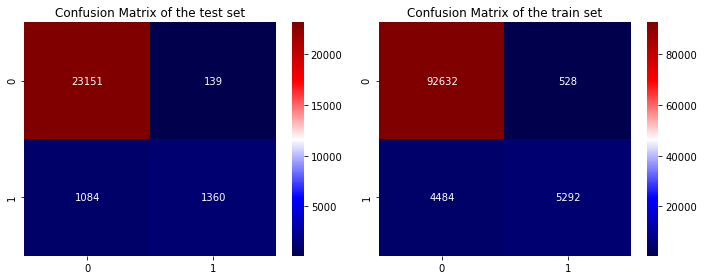

In [142]:
show_confusion_matrix(lg_clf_rs)

#  Decision Tree

In [165]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [166]:
print_scores(dt_clf)

scores for default model on test set

Accuracy Score : 0.9153260278231133
Precision Score : 0.5481993452164423
Recall Score : 0.6166121112929623
F1 Score : 0.5803966878490274


scores for default model on train set

Accuracy Score : 1.0
Precision Score : 1.0
Recall Score : 1.0
F1 Score : 1.0


### Massive overfitting here

In [145]:
cv_score= cross_val_score(dt_clf, X_train, y_train, cv=10, scoring= "f1")
print(cv_score)
print("")
print(cv_score.mean())
print(cv_score.std())

[0.57866537 0.57101589 0.55142443 0.58870168 0.55652174 0.56110836
 0.5697561  0.56801196 0.58541361 0.57980769]

0.5710426830315208
0.01165572875095475


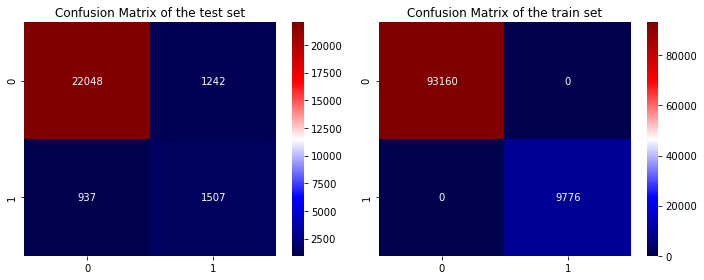

In [146]:
show_confusion_matrix(dt_clf)

#  Randomized Search on Decision Tree

In [147]:
fold = StratifiedKFold(n_splits=4, shuffle=True, random_state=0) 

parameters= {"criterion": ["gini", "entropy"], \
             "class_weight": [{1:0.67, 0:0.33}, {1:0.75, 0:0.25}, {1:0.8, 0:0.2}, "None", "balanced"], \
            "max_depth": range(5,60) , \
            "min_samples_leaf" : range(5,50), \
            "min_samples_split" : [10, 20, 30, 40, 50]}

model = DecisionTreeClassifier()
model_rs =RandomizedSearchCV(model, parameters, cv= fold, verbose=2, scoring="f1", n_iter=50)
model_rs.fit(X_train,y_train)



Fitting 4 folds for each of 50 candidates, totalling 200 fits
[CV] min_samples_split=30, min_samples_leaf=6, max_depth=49, criterion=gini, class_weight={1: 0.67, 0: 0.33} 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_samples_split=30, min_samples_leaf=6, max_depth=49, criterion=gini, class_weight={1: 0.67, 0: 0.33}, total=   3.3s
[CV] min_samples_split=30, min_samples_leaf=6, max_depth=49, criterion=gini, class_weight={1: 0.67, 0: 0.33} 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV]  min_samples_split=30, min_samples_leaf=6, max_depth=49, criterion=gini, class_weight={1: 0.67, 0: 0.33}, total=   3.3s
[CV] min_samples_split=30, min_samples_leaf=6, max_depth=49, criterion=gini, class_weight={1: 0.67, 0: 0.33} 
[CV]  min_samples_split=30, min_samples_leaf=6, max_depth=49, criterion=gini, class_weight={1: 0.67, 0: 0.33}, total=   3.3s
[CV] min_samples_split=30, min_samples_leaf=6, max_depth=49, criterion=gini, class_weight={1: 0.67, 0: 0.33} 
[CV]  min_samples_split=30, min_samples_leaf=6, max_depth=49, criterion=gini, class_weight={1: 0.67, 0: 0.33}, total=   3.5s
[CV] min_samples_split=20, min_samples_leaf=31, max_depth=21, criterion=gini, class_weight=balanced 
[CV]  min_samples_split=20, min_samples_leaf=31, max_depth=21, criterion=gini, class_weight=balanced, total=   1.6s
[CV] min_samples_split=20, min_samples_leaf=31, max_depth=21, criterion=gini, class_weight=balanced 
[CV]  min_samples_split=20, min_samples_leaf=31, max_depth=21, criterion=gini, class_we

[CV]  min_samples_split=30, min_samples_leaf=28, max_depth=42, criterion=entropy, class_weight={1: 0.8, 0: 0.2}, total=   2.4s
[CV] min_samples_split=30, min_samples_leaf=28, max_depth=42, criterion=entropy, class_weight={1: 0.8, 0: 0.2} 
[CV]  min_samples_split=30, min_samples_leaf=28, max_depth=42, criterion=entropy, class_weight={1: 0.8, 0: 0.2}, total=   2.7s
[CV] min_samples_split=30, min_samples_leaf=28, max_depth=42, criterion=entropy, class_weight={1: 0.8, 0: 0.2} 
[CV]  min_samples_split=30, min_samples_leaf=28, max_depth=42, criterion=entropy, class_weight={1: 0.8, 0: 0.2}, total=   3.7s
[CV] min_samples_split=50, min_samples_leaf=26, max_depth=46, criterion=gini, class_weight={1: 0.75, 0: 0.25} 
[CV]  min_samples_split=50, min_samples_leaf=26, max_depth=46, criterion=gini, class_weight={1: 0.75, 0: 0.25}, total=   2.9s
[CV] min_samples_split=50, min_samples_leaf=26, max_depth=46, criterion=gini, class_weight={1: 0.75, 0: 0.25} 
[CV]  min_samples_split=50, min_samples_leaf=26

[CV]  min_samples_split=20, min_samples_leaf=43, max_depth=11, criterion=entropy, class_weight=balanced, total=   0.6s
[CV] min_samples_split=20, min_samples_leaf=43, max_depth=11, criterion=entropy, class_weight=balanced 
[CV]  min_samples_split=20, min_samples_leaf=43, max_depth=11, criterion=entropy, class_weight=balanced, total=   0.6s
[CV] min_samples_split=20, min_samples_leaf=43, max_depth=11, criterion=entropy, class_weight=balanced 
[CV]  min_samples_split=20, min_samples_leaf=43, max_depth=11, criterion=entropy, class_weight=balanced, total=   0.5s
[CV] min_samples_split=20, min_samples_leaf=24, max_depth=40, criterion=entropy, class_weight=balanced 
[CV]  min_samples_split=20, min_samples_leaf=24, max_depth=40, criterion=entropy, class_weight=balanced, total=   2.4s
[CV] min_samples_split=20, min_samples_leaf=24, max_depth=40, criterion=entropy, class_weight=balanced 
[CV]  min_samples_split=20, min_samples_leaf=24, max_depth=40, criterion=entropy, class_weight=balanced, tot

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 199, in fit
    expanded_class_weight = compute_sample_weight(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/class_weight.py", line 122, in compute_sa

[CV]  min_samples_split=40, min_samples_leaf=8, max_depth=27, criterion=entropy, class_weight={1: 0.67, 0: 0.33}, total=   1.6s
[CV] min_samples_split=40, min_samples_leaf=8, max_depth=27, criterion=entropy, class_weight={1: 0.67, 0: 0.33} 
[CV]  min_samples_split=40, min_samples_leaf=8, max_depth=27, criterion=entropy, class_weight={1: 0.67, 0: 0.33}, total=   1.9s
[CV] min_samples_split=40, min_samples_leaf=8, max_depth=27, criterion=entropy, class_weight={1: 0.67, 0: 0.33} 
[CV]  min_samples_split=40, min_samples_leaf=8, max_depth=27, criterion=entropy, class_weight={1: 0.67, 0: 0.33}, total=   2.0s
[CV] min_samples_split=40, min_samples_leaf=8, max_depth=27, criterion=entropy, class_weight={1: 0.67, 0: 0.33} 
[CV]  min_samples_split=40, min_samples_leaf=8, max_depth=27, criterion=entropy, class_weight={1: 0.67, 0: 0.33}, total=   2.1s
[CV] min_samples_split=20, min_samples_leaf=44, max_depth=27, criterion=entropy, class_weight=None 
[CV]  min_samples_split=20, min_samples_leaf=44, 

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 199, in fit
    expanded_class_weight = compute_sample_weight(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/class_weight.py", line 122, in compute_sa

[CV]  min_samples_split=20, min_samples_leaf=13, max_depth=57, criterion=entropy, class_weight={1: 0.75, 0: 0.25}, total=   2.8s
[CV] min_samples_split=20, min_samples_leaf=13, max_depth=57, criterion=entropy, class_weight={1: 0.75, 0: 0.25} 
[CV]  min_samples_split=20, min_samples_leaf=13, max_depth=57, criterion=entropy, class_weight={1: 0.75, 0: 0.25}, total=   2.7s
[CV] min_samples_split=20, min_samples_leaf=13, max_depth=57, criterion=entropy, class_weight={1: 0.75, 0: 0.25} 
[CV]  min_samples_split=20, min_samples_leaf=13, max_depth=57, criterion=entropy, class_weight={1: 0.75, 0: 0.25}, total=   2.7s
[CV] min_samples_split=20, min_samples_leaf=13, max_depth=57, criterion=entropy, class_weight={1: 0.75, 0: 0.25} 
[CV]  min_samples_split=20, min_samples_leaf=13, max_depth=57, criterion=entropy, class_weight={1: 0.75, 0: 0.25}, total=   2.8s
[CV] min_samples_split=50, min_samples_leaf=39, max_depth=42, criterion=gini, class_weight={1: 0.75, 0: 0.25} 
[CV]  min_samples_split=50, min

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 199, in fit
    expanded_class_weight = compute_sample_weight(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/class_weight.py", line 122, in compute_sa

[CV]  min_samples_split=10, min_samples_leaf=26, max_depth=38, criterion=gini, class_weight=None, total=   0.0s
[CV] min_samples_split=10, min_samples_leaf=22, max_depth=36, criterion=entropy, class_weight={1: 0.8, 0: 0.2} 
[CV]  min_samples_split=10, min_samples_leaf=22, max_depth=36, criterion=entropy, class_weight={1: 0.8, 0: 0.2}, total=   2.3s
[CV] min_samples_split=10, min_samples_leaf=22, max_depth=36, criterion=entropy, class_weight={1: 0.8, 0: 0.2} 
[CV]  min_samples_split=10, min_samples_leaf=22, max_depth=36, criterion=entropy, class_weight={1: 0.8, 0: 0.2}, total=   2.3s
[CV] min_samples_split=10, min_samples_leaf=22, max_depth=36, criterion=entropy, class_weight={1: 0.8, 0: 0.2} 
[CV]  min_samples_split=10, min_samples_leaf=22, max_depth=36, criterion=entropy, class_weight={1: 0.8, 0: 0.2}, total=   2.6s
[CV] min_samples_split=10, min_samples_leaf=22, max_depth=36, criterion=entropy, class_weight={1: 0.8, 0: 0.2} 
[CV]  min_samples_split=10, min_samples_leaf=22, max_depth=

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 199, in fit
    expanded_class_weight = compute_sample_weight(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/class_weight.py", line 122, in compute_sa

[CV]  min_samples_split=20, min_samples_leaf=27, max_depth=41, criterion=entropy, class_weight={1: 0.75, 0: 0.25}, total=   2.4s
[CV] min_samples_split=20, min_samples_leaf=27, max_depth=41, criterion=entropy, class_weight={1: 0.75, 0: 0.25} 
[CV]  min_samples_split=20, min_samples_leaf=27, max_depth=41, criterion=entropy, class_weight={1: 0.75, 0: 0.25}, total=   2.3s
[CV] min_samples_split=20, min_samples_leaf=27, max_depth=41, criterion=entropy, class_weight={1: 0.75, 0: 0.25} 
[CV]  min_samples_split=20, min_samples_leaf=27, max_depth=41, criterion=entropy, class_weight={1: 0.75, 0: 0.25}, total=   2.3s
[CV] min_samples_split=20, min_samples_leaf=27, max_depth=41, criterion=entropy, class_weight={1: 0.75, 0: 0.25} 
[CV]  min_samples_split=20, min_samples_leaf=27, max_depth=41, criterion=entropy, class_weight={1: 0.75, 0: 0.25}, total=   2.6s
[CV] min_samples_split=40, min_samples_leaf=17, max_depth=38, criterion=entropy, class_weight={1: 0.67, 0: 0.33} 
[CV]  min_samples_split=40, 

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 199, in fit
    expanded_class_weight = compute_sample_weight(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/class_weight.py", line 122, in compute_sa

[CV]  min_samples_split=30, min_samples_leaf=5, max_depth=33, criterion=gini, class_weight={1: 0.8, 0: 0.2}, total=   2.6s
[CV] min_samples_split=30, min_samples_leaf=5, max_depth=33, criterion=gini, class_weight={1: 0.8, 0: 0.2} 
[CV]  min_samples_split=30, min_samples_leaf=5, max_depth=33, criterion=gini, class_weight={1: 0.8, 0: 0.2}, total=   2.4s
[CV] min_samples_split=30, min_samples_leaf=5, max_depth=33, criterion=gini, class_weight={1: 0.8, 0: 0.2} 
[CV]  min_samples_split=30, min_samples_leaf=5, max_depth=33, criterion=gini, class_weight={1: 0.8, 0: 0.2}, total=   2.4s
[CV] min_samples_split=30, min_samples_leaf=5, max_depth=33, criterion=gini, class_weight={1: 0.8, 0: 0.2} 
[CV]  min_samples_split=30, min_samples_leaf=5, max_depth=33, criterion=gini, class_weight={1: 0.8, 0: 0.2}, total=   2.6s
[CV] min_samples_split=30, min_samples_leaf=30, max_depth=52, criterion=gini, class_weight=balanced 
[CV]  min_samples_split=30, min_samples_leaf=30, max_depth=52, criterion=gini, clas

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 199, in fit
    expanded_class_weight = compute_sample_weight(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/class_weight.py", line 122, in compute_sa

[CV]  min_samples_split=30, min_samples_leaf=13, max_depth=20, criterion=gini, class_weight={1: 0.8, 0: 0.2}, total=   1.1s
[CV] min_samples_split=30, min_samples_leaf=13, max_depth=20, criterion=gini, class_weight={1: 0.8, 0: 0.2} 
[CV]  min_samples_split=30, min_samples_leaf=13, max_depth=20, criterion=gini, class_weight={1: 0.8, 0: 0.2}, total=   1.3s
[CV] min_samples_split=30, min_samples_leaf=13, max_depth=20, criterion=gini, class_weight={1: 0.8, 0: 0.2} 
[CV]  min_samples_split=30, min_samples_leaf=13, max_depth=20, criterion=gini, class_weight={1: 0.8, 0: 0.2}, total=   1.3s
[CV] min_samples_split=30, min_samples_leaf=13, max_depth=20, criterion=gini, class_weight={1: 0.8, 0: 0.2} 
[CV]  min_samples_split=30, min_samples_leaf=13, max_depth=20, criterion=gini, class_weight={1: 0.8, 0: 0.2}, total=   1.5s
[CV] min_samples_split=40, min_samples_leaf=11, max_depth=40, criterion=entropy, class_weight=None 
[CV]  min_samples_split=40, min_samples_leaf=11, max_depth=40, criterion=entr

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 199, in fit
    expanded_class_weight = compute_sample_weight(
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/class_weight.py", line 122, in compute_sa


[CV]  min_samples_split=30, min_samples_leaf=25, max_depth=54, criterion=entropy, class_weight={1: 0.8, 0: 0.2}, total=   2.6s
[CV] min_samples_split=30, min_samples_leaf=25, max_depth=54, criterion=entropy, class_weight={1: 0.8, 0: 0.2} 
[CV]  min_samples_split=30, min_samples_leaf=25, max_depth=54, criterion=entropy, class_weight={1: 0.8, 0: 0.2}, total=   2.5s
[CV] min_samples_split=30, min_samples_leaf=25, max_depth=54, criterion=entropy, class_weight={1: 0.8, 0: 0.2} 
[CV]  min_samples_split=30, min_samples_leaf=25, max_depth=54, criterion=entropy, class_weight={1: 0.8, 0: 0.2}, total=   2.5s
[CV] min_samples_split=30, min_samples_leaf=25, max_depth=54, criterion=entropy, class_weight={1: 0.8, 0: 0.2} 
[CV]  min_samples_split=30, min_samples_leaf=25, max_depth=54, criterion=entropy, class_weight={1: 0.8, 0: 0.2}, total=   2.5s
[CV] min_samples_split=40, min_samples_leaf=45, max_depth=42, criterion=gini, class_weight=balanced 
[CV]  min_samples_split=40, min_samples_leaf=45, max_d

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  5.5min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=0, shuffle=True),
                   estimator=DecisionTreeClassifier(), n_iter=50,
                   param_distributions={'class_weight': [{0: 0.33, 1: 0.67},
                                                         {0: 0.25, 1: 0.75},
                                                         {0: 0.2, 1: 0.8},
                                                         'None', 'balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(5, 60),
                                        'min_samples_leaf': range(5, 50),
                                        'min_samples_split': [10, 20, 30, 40,
                                                              50]},
                   scoring='f1', verbose=2)

In [148]:
print("tuned hpyerparameters :(best parameters) ",model_rs.best_params_)
print("accuracy :",model_rs.best_score_)

tuned hpyerparameters :(best parameters)  {'min_samples_split': 50, 'min_samples_leaf': 37, 'max_depth': 37, 'criterion': 'gini', 'class_weight': {1: 0.67, 0: 0.33}}
accuracy : 0.6875005149417299


In [150]:
dt_clf_rs = model_rs.best_estimator_

In [151]:
print_scores(dt_clf_rs)


scores for default model on test set

Accuracy Score : 0.9484728374912567
Precision Score : 0.8011853448275862
Recall Score : 0.6084288052373159
F1 Score : 0.6916279069767441


scores for default model on train set

Accuracy Score : 0.9531845029921505
Precision Score : 0.8426655606249136
Recall Score : 0.6234656301145662
F1 Score : 0.7166794050208712


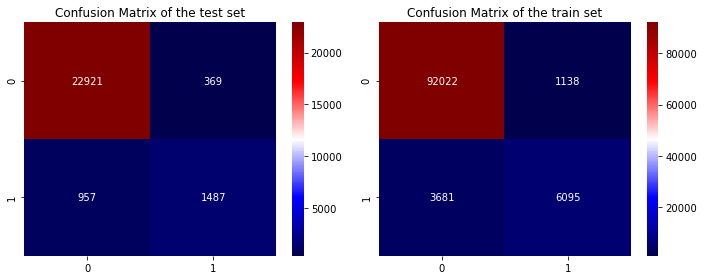

In [152]:
show_confusion_matrix(dt_clf_rs)

# Random Forest

In [153]:
from sklearn.ensemble import RandomForestClassifier

In [154]:
fold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0) 

parameters= {"criterion": ["gini", "entropy"], \
             "class_weight": [{1:0.67, 0:0.33}, {1:0.75, 0:0.25}, {1:0.8, 0:0.2}, "None", "balanced"], \
            "max_depth": range(5,60) , \
            "min_samples_leaf" : range(5,50), \
            "min_samples_split" : [10, 20, 30, 40, 50], \
             "n_estimators" : [50, 100, 200, 300, 400]}

model = RandomForestClassifier()
model_rs =RandomizedSearchCV(model, parameters, cv=kfold, verbose=2, scoring="f1", n_iter=10)
model_rs.fit(X_train,y_train)



Fitting 4 folds for each of 10 candidates, totalling 40 fits
[CV] n_estimators=50, min_samples_split=20, min_samples_leaf=7, max_depth=48, criterion=entropy, class_weight=balanced 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=50, min_samples_split=20, min_samples_leaf=7, max_depth=48, criterion=entropy, class_weight=balanced, total=  15.7s
[CV] n_estimators=50, min_samples_split=20, min_samples_leaf=7, max_depth=48, criterion=entropy, class_weight=balanced 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.7s remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=20, min_samples_leaf=7, max_depth=48, criterion=entropy, class_weight=balanced, total=  15.1s
[CV] n_estimators=50, min_samples_split=20, min_samples_leaf=7, max_depth=48, criterion=entropy, class_weight=balanced 
[CV]  n_estimators=50, min_samples_split=20, min_samples_leaf=7, max_depth=48, criterion=entropy, class_weight=balanced, total=  16.6s
[CV] n_estimators=50, min_samples_split=20, min_samples_leaf=7, max_depth=48, criterion=entropy, class_weight=balanced 
[CV]  n_estimators=50, min_samples_split=20, min_samples_leaf=7, max_depth=48, criterion=entropy, class_weight=balanced, total=  17.3s
[CV] n_estimators=50, min_samples_split=20, min_samples_leaf=28, max_depth=27, criterion=gini, class_weight={1: 0.75, 0: 0.25} 
[CV]  n_estimators=50, min_samples_split=20, min_samples_leaf=28, max_depth=27, criterion=gini, class_weight={1: 0.75, 0: 0.25}, total=   8.3s
[CV] n_estimators=50, min_samples_split=20, min_samples_leaf=28, max_depth=27, crite

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 330, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 581, in _validate_y_class_weight
    raise ValueError('Valid presets for class_weight include '
ValueError: Valid presets for class_weight include "balanced" and "balanced_subsample".Given "None".

  warnings.warn("Estimator fit failed. The score on this train-test"
/Us

[CV]  n_estimators=400, min_samples_split=50, min_samples_leaf=49, max_depth=22, criterion=gini, class_weight=None, total=   0.0s
[CV] n_estimators=400, min_samples_split=50, min_samples_leaf=49, max_depth=22, criterion=gini, class_weight=None 
[CV]  n_estimators=400, min_samples_split=50, min_samples_leaf=49, max_depth=22, criterion=gini, class_weight=None, total=   0.0s
[CV] n_estimators=200, min_samples_split=30, min_samples_leaf=37, max_depth=14, criterion=gini, class_weight={1: 0.8, 0: 0.2} 


/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 330, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 581, in _validate_y_class_weight
    raise ValueError('Valid presets for class_weight include '
ValueError: Valid presets for class_weight include "balanced" and "balanced_subsample".Given "None".

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=200, min_samples_split=30, min_samples_leaf=37, max_depth=14, criterion=gini, class_weight={1: 0.8, 0: 0.2}, total=  17.9s
[CV] n_estimators=200, min_samples_split=30, min_samples_leaf=37, max_depth=14, criterion=gini, class_weight={1: 0.8, 0: 0.2} 
[CV]  n_estimators=200, min_samples_split=30, min_samples_leaf=37, max_depth=14, criterion=gini, class_weight={1: 0.8, 0: 0.2}, total=  19.0s
[CV] n_estimators=200, min_samples_split=30, min_samples_leaf=37, max_depth=14, criterion=gini, class_weight={1: 0.8, 0: 0.2} 
[CV]  n_estimators=200, min_samples_split=30, min_samples_leaf=37, max_depth=14, criterion=gini, class_weight={1: 0.8, 0: 0.2}, total=  15.3s
[CV] n_estimators=200, min_samples_split=30, min_samples_leaf=37, max_depth=14, criterion=gini, class_weight={1: 0.8, 0: 0.2} 
[CV]  n_estimators=200, min_samples_split=30, min_samples_leaf=37, max_depth=14, criterion=gini, class_weight={1: 0.8, 0: 0.2}, total=  14.1s
[CV] n_estimators=400, min_samples_split=40, min_sa

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 330, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 581, in _validate_y_class_weight
    raise ValueError('Valid presets for class_weight include '
ValueError: Valid presets for class_weight include "balanced" and "balanced_subsample".Given "None".

  warnings.warn("Estimator fit failed. The score on this train-test"
/Us

[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=27, max_depth=48, criterion=gini, class_weight={1: 0.75, 0: 0.25}, total=  21.2s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=27, max_depth=48, criterion=gini, class_weight={1: 0.75, 0: 0.25} 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=27, max_depth=48, criterion=gini, class_weight={1: 0.75, 0: 0.25}, total=  19.3s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=27, max_depth=48, criterion=gini, class_weight={1: 0.75, 0: 0.25} 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=27, max_depth=48, criterion=gini, class_weight={1: 0.75, 0: 0.25}, total=  17.0s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=27, max_depth=48, criterion=gini, class_weight={1: 0.75, 0: 0.25} 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=27, max_depth=48, criterion=gini, class_weight={1: 0.75, 0: 0.25}, total=  17.3s
[CV] n_estimators=400, min_samples_sp

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 14.4min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=0, shuffle=True),
                   estimator=RandomForestClassifier(),
                   param_distributions={'class_weight': [{0: 0.33, 1: 0.67},
                                                         {0: 0.25, 1: 0.75},
                                                         {0: 0.2, 1: 0.8},
                                                         'None', 'balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(5, 60),
                                        'min_samples_leaf': range(5, 50),
                                        'min_samples_split': [10, 20, 30, 40,
                                                              50],
                                        'n_estimators': [50, 100, 200, 300,
                                                         400]},
                   scoring='f1', verbose=2)

In [155]:
print("tuned hpyerparameters :(best parameters) ",model_rs.best_params_)
print("accuracy :",model_rs.best_score_)

tuned hpyerparameters :(best parameters)  {'n_estimators': 300, 'min_samples_split': 40, 'min_samples_leaf': 25, 'max_depth': 25, 'criterion': 'gini', 'class_weight': {1: 0.67, 0: 0.33}}
accuracy : 0.6995452809763139


In [156]:
rf_clf_rs = model_rs.best_estimator_

In [157]:
print_scores(rf_clf_rs)


scores for default model on test set

Accuracy Score : 0.9576047252661848
Precision Score : 0.9985261606484893
Recall Score : 0.5544189852700491
F1 Score : 0.7129702709813206


scores for default model on train set

Accuracy Score : 0.9561475091318877
Precision Score : 0.9994305239179955
Recall Score : 0.538563829787234
F1 Score : 0.6999468226535496


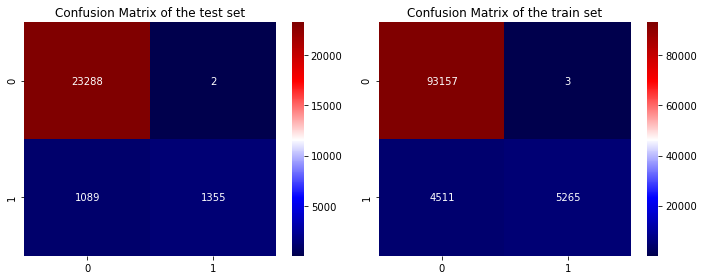

In [158]:
show_confusion_matrix(rf_clf_rs)

### Seems like this model is good at predicting lack of fraud  but not fraud

#  SVM

In [159]:
from sklearn.svm import SVC

In [160]:
svc_clf = SVC()

In [162]:
svc_clf.fit(X_train, y_train)

SVC()

In [163]:
print_scores(svc_clf)

scores for default model on test set

Accuracy Score : 0.9568664024248077
Precision Score : 0.9868613138686131
Recall Score : 0.5531914893617021
F1 Score : 0.7089669638175143


scores for default model on train set

Accuracy Score : 0.9555549079039403
Precision Score : 0.9889076894153036
Recall Score : 0.5380523731587561
F1 Score : 0.6969195097714476


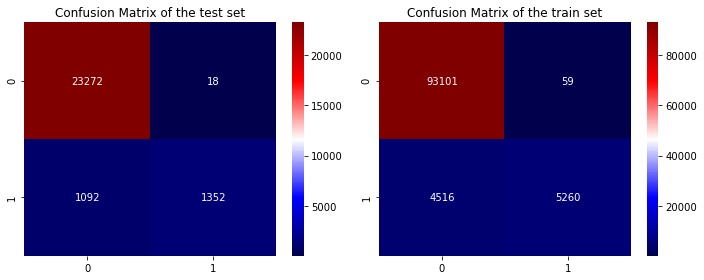

In [164]:
show_confusion_matrix(svc_clf)

# AdaBoost
    - Seems like the best model is our decision tree from the gridsearch 
    - Let's try to Boost it through AdaBoost
    - For time purposes we will use the default parameters

In [167]:
from sklearn.ensemble import AdaBoostClassifier

In [181]:
adab_clf = AdaBoostClassifier(base_estimator = rf_clf_rs)

In [182]:
adab_clf.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(class_weight={0: 0.33,
                                                                       1: 0.67},
                                                         max_depth=25,
                                                         min_samples_leaf=25,
                                                         min_samples_split=40,
                                                         n_estimators=300))

In [183]:
print_scores(adab_clf)

scores for default model on test set

Accuracy Score : 0.9552343203543949
Precision Score : 0.9233289646133683
Recall Score : 0.5765139116202946
F1 Score : 0.709823677581864


scores for default model on train set

Accuracy Score : 0.9960849459858553
Precision Score : 0.9973469171176907
Recall Score : 0.9613338788870703
F1 Score : 0.9790093234022605


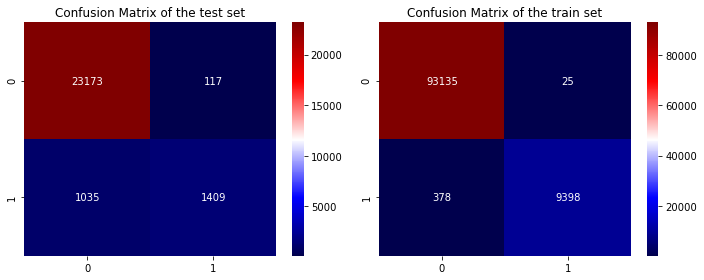

In [184]:
show_confusion_matrix(adab_clf)

### Conclusion 
- The Adaboost model shows a lot of overfitting 
- Due to processing time constraints, we could not run a gridsearch cross validation on adaboost to optimize hyper parameters and avoid overfitting
- All in all, it seems that the decision tree was the most efficient model, in terms of accuracy and processing time